In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import pylab as pl


%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jonathan\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:

#Usual packages for import

from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
from scipy.cluster.hierarchy import dendrogram, linkage
#import sklearn.clusterEC
from scipy.cluster.vq import whiten

from scipy import cluster
#from geopy.distance import great_circle
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster as scp

from scipy.spatial.distance import cdist, pdist

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2


# url handlers

import ast
import urllib.request
from io import StringIO
import os
import zipfile

try:
    #Packages for Python 3
    from urllib.parse import urlencode
    from urllib.request import urlopen
    from urllib.error import HTTPError
    
except ImportError:
    #Packages for Python 2
    from urllib import urlencode
    from urllib2 import urlopen, HTTPError
    
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

#from geopy.geocoders import Nominatim
#import geopandas as gp

import scipy.stats
import seaborn as sns
import statsmodels.api as sm
plt.style.use('seaborn')

%pylab inline

## additional imports (although I'm not sure I ended up using them)
#import choroplethNYC as cp
#import categoricalcolorbar as ccb

C:\Users\Jonathan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('../01 Data/schma19962016.csv')
df.head()

C:\Users\Jonathan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (124,125,126,148,149,150,183,220,221,222,226,227,230,231,232,234,235,247) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DBN,SCHNAM,YEAR,SCHLEV,SCHLEV5,SCHS219962016,XDBN,XDBN_FLAG,ENRNUMPRK,ENRNUMKID,...,BNLONG_YRFIRST,BNLONG_YRLAST,BNLONG_TOTALYRS,BNLONG_PHASEDOUT19962016,BNLONG_PHASEDIN19962016,BNLONG_CONTOPERATE19962016,CBO,HSJHS,HSSCHSAMP2,SPECHS
0,00M801,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M801,0,16,48,...,1996,1998,3.0,1,0,0,0,NaN,6,0
1,00M802,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M802,0,0,0,...,1996,1998,3.0,1,0,0,0,1.0,6,0
2,00M803,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M803,0,0,0,...,1996,1998,3.0,1,0,0,0,0.0,6,0
3,01M015,ROBERTO CLEMENTE,1996,NaN,NaN,NaN,01M015,0,0,36,...,1996,2016,21.0,0,0,0,0,NaN,6,0
4,01M019,ASHER LEVY,1996,NaN,NaN,NaN,01M019,0,33,82,...,1996,2016,21.0,0,0,0,0,NaN,6,0


In [4]:
df.shape

(30345, 270)

In [5]:
df['BNLONG_CONTOPERATE19962016'].value_counts(dropna=False)

0    30345
Name: BNLONG_CONTOPERATE19962016, dtype: int64

In [6]:
#highest year for BN number -- when a school was closed?
df['BNLONG_YRLAST'].value_counts(dropna=False)

2016    26658
2015      965
2014      436
2007      255
2011      239
2006      230
2010      195
2009      169
2005      167
2008      160
2004      150
2012      130
2002      124
2001      115
2013      114
2003       94
2000       51
1998       35
1999       32
1997       18
1996        8
Name: BNLONG_YRLAST, dtype: int64

Which schools have closed down?

Renewal schools:
PS 050 Vito Marcantonio (04M050) 2017
Coalition School for Social Change (04M409) 2017
High School for Health Careers and Sciences (06M468) 2017
New Explorers High School (07X547) 2017
Urban Science Academy (09X325) 2017
PS 92 Bronx School (12X092) 2017
Brooklyn Collegiate: A College Board School (23K493) 2017
PS/MS 42 R. Vernam (27Q042) 2017
MS 53 Brian Piccolo (27Q053) 2017
Holcombe L. Rucker School of Community (08X332) 2017
Entrada Academy (12X384)
Middle School of Marketing and Legal Studies (18K598)
Gregory Jocko Jackson School (23K284) (just middle school years)
P.S. 306 Ethan Allen and P.S. 165 Ida Posner. (truncating middle schools)
Paul Robeson High School 


Hard to find out which are schools that have been shut down!

Features notes
- academic expectations (average, and compared to city and peer horizon scores) - could be a good measure of school performance? (comparing expectation to peer horizon)
- attendance -- have some grades reporting over 100% attendnace?



In [7]:
df[df.HSSCHSAMP2 == 4]

,DBN,SCHNAM,YEAR,SCHLEV,SCHLEV5,SCHS219962016,XDBN,XDBN_FLAG,ENRNUMPRK,ENRNUMKID,...,BNLONG_YRFIRST,BNLONG_YRLAST,BNLONG_TOTALYRS,BNLONG_PHASEDOUT19962016,BNLONG_PHASEDIN19962016,BNLONG_CONTOPERATE19962016,CBO,HSJHS,HSSCHSAMP2,SPECHS
1108,79K409,EAST NEW YORK FAMILY ACADEMY,1996,NaN,NaN,NaN,79K409,0,0,0,...,1996,2015,NaN,1,0,0,0,0.0,4,0
1109,79K510,AUX SERVICES (BROOKLYN),1996,NaN,NaN,NaN,79K510,0,0,0,...,1996,2015,NaN,1,0,0,0,NaN,4,0
1110,79K511,BEDFORD STUYVESANT OUTREACH,1996,NaN,NaN,NaN,79K511,0,0,0,...,1996,2003,8.0,1,0,0,0,0.0,4,0
1111,79K512,BUSHWICK OUTREACH,1996,NaN,NaN,NaN,79K512,0,0,0,...,1996,2004,9.0,1,0,0,0,0.0,4,0
1112,79K565,HIGH SCHOOL REDIRECTION,1996,NaN,NaN,NaN,79K565,0,0,0,...,1996,2004,9.0,1,0,0,0,0.0,4,0
1113,79K573,BROOKLYN BOROUGH ACADEMY,1996,NaN,NaN,NaN,79K573,0,0,0,...,1996,2003,8.0,1,0,0,0,0.0,4,0
1114,79K580,BROOKLYN LITERACY CENTER,1996,NaN,NaN,NaN,79K580,0,0,0,...,1996,2003,8.0,1,0,0,0,0.0,4,0
1115,79K591,BROOKLYN OFF-SITE ED SERVICES,1996,NaN,NaN,NaN,79K591,0,0,0,...,1996,2005,10.0,1,0,0,0,0.0,4,0
1116,79K665,NYC VOCATIONAL TRAINING CENTER,1996,NaN,NaN,NaN,79K665,0,0,0,...,1996,2007,12.0,1,0,0,0,0.0,4,0
1117,79K931,TEEN AID HIGH SCHOOL,1996,NaN,NaN,NaN,79K931,0,0,0,...,1996,2002,7.0,1,0,0,0,0.0,4,0


In [8]:
df.LCGSTAT.value_counts(dropna=False)

OPEN      19689
NaN       10632
CLOSED       24
Name: LCGSTAT, dtype: int64

# Feature engineering

In [9]:
df_feats = pd.read_csv('../01 Data/schma features of interest.csv')
df_feats.head()

,Feat_Code,Feat_expl,Notes
0,ATTPCTG01,School attendnace,NaN
1,ATTPCTG02,School attendnace,NaN
2,ATTPCTG03,School attendnace,NaN
3,ATTPCTG04,School attendnace,NaN
4,ATTPCTG05,School attendnace,NaN


In [10]:
codes = df_feats.Feat_Code

In [11]:
keep = df.columns[df.columns.isin(codes)]

In [12]:
keep = list(keep)

In [13]:
for x in ['DBN','SCHNAM','YEAR','BNLONG']:
    keep.append(x)

In [14]:
df.shape

(30345, 270)

In [15]:
df[keep].shape

(30345, 146)

In [16]:
#keeping only the features of interest
df = df[keep]

In [17]:
df_feats.sort_values(by='Notes').head(20)

,Feat_Code,Feat_expl,Notes
16,CCDENRNUMFRL,CCD: NUMBER STUDENTS ELIGIBLE FOR THE FREE OR ...,*need to normalize
17,CCDNUMFTE,CCD: CLASSROOM TEACHERS (FTE),*normalize by no stu
100,LCGSTAT,open close status,24 noted as closed
89,HPGPERDIP4AVG,HS PROG RPT: 4-YEAR DIPLOMA RATE (AVERAGE),CAN BE AN OUTCOME
88,HPGGENREGREMAVG,HS PROG RPT: COMPLETION RATE FOR REMAINING REG...,CAN BE AN OUTCOME
87,HPGGEN10CYR3AVG,HS PROG RPT: % 3RD YEAR GEN STUDENTS EARNING 1...,CAN BE AN OUTCOME
90,HPGPERDIP6AVG,HS PROG RPT: 6-YEAR RATE DIPLOMA (AVERAGE),CAN BE AN OUTCOME
85,HPGGEN10CYR1AVG,HS PROG RPT: % 1ST YEAR GEN STUDENTS EARNING 1...,CAN BE AN OUTCOME
84,HPGG08PROF,HS PROG RPT: AVERAGE 8TH GRADE PROFICIENCY,CAN BE AN OUTCOME
86,HPGGEN10CYR2AVG,HS PROG RPT: % 2ND YEAR GEN STUDENTS EARNING 1...,CAN BE AN OUTCOME


In [18]:
df['CCDNUMFTE_normd'] = (df['CCDNUMFTE'] / df['ENRNUMTOT'])

In [19]:
df['CCDENRNUMFRL_normd'] = (df['CCDENRNUMFRL'] / df['ENRNUMTOT'])

In [20]:
df['LCGSCHTYP'].value_counts(dropna=False).index

Index([ 'GENERAL ACADEMIC',                 nan,                 'S',
       'SPECIAL EDUCATION',   'TRANSFER SCHOOL',       'ALTERNATIVE',
        'CAREER TECHNICAL',       'HOME SCHOOL',              'YABC',
       'SUSPENSION CENTER',                'FC',                 'P',
                       'I',       'BUDGET ONLY',    'NOT APPLICABLE',
                   'ADULT'],
      dtype='object')

YABC = young adult burrough center\

In [21]:
len(df[df['LCGSCHTYP'].isin(['HOME SCHOOL','YABC',
       'SUSPENSION CENTER', 'FC',  'P',
             'BUDGET ONLY', 'NOT APPLICABLE','I',
                   'ADULT'])])

78

In [22]:
#dropping alt school types
df = df[~df['LCGSCHTYP'].isin(['HOME SCHOOL','YABC',
       'SUSPENSION CENTER', 'FC',  'P',
             'BUDGET ONLY', 'NOT APPLICABLE','I',
                   'ADULT'])]

In [23]:
df.shape

(30267, 148)

In [24]:
## Create new variables Black enrolment %, Hispanic enrolment %, White enrolment %, Special Education enrolment %
## Divide ['ENRNUMAFM', 'ENRNUMHIS', 'ENRNUMWHT',  'ENRNUMSPD' ] by 'ENRNUMTOT'

df['ENRPCTAFM'] = df['ENRNUMAFM'] / df['ENRNUMTOT']
df['ENRPCTHIS'] = df['ENRNUMHIS'] / df['ENRNUMTOT']
df['ENRPCTWHT'] = df['ENRNUMWHT'] / df['ENRNUMTOT'] 
df['ENRPCTSPD'] = df['ENRNUMSPD'] / df['ENRNUMTOT']


In [25]:
df.isnull().sum(axis=1).sort_values(ascending=False)

4104     127
3900     127
3534     127
4082     127
4045     127
4029     127
3996     127
3963     127
3932     127
3864     127
4175     127
3809     127
3770     127
3737     127
3709     127
3679     127
3658     127
3630     127
4140     127
3602     127
4211     127
4364     127
4588     127
4567     127
4475     127
4441     127
4408     127
4508     127
4334     127
4300     127
        ... 
15877     31
16561     31
14362     31
16717     31
15878     31
16110     31
15770     31
16410     31
25332     28
11056     28
16379     26
26895     25
12523     25
14021     24
23675     23
17932     22
11399     20
18649     19
18796     19
25195     19
22039     17
17213     17
20408     17
23535     17
20259     17
21895     17
15526     16
17069     15
15673     14
14161     14
Length: 30267, dtype: int64

In [26]:
#check nans
df.isnull().sum().sort_values(ascending=False)

CLSAVGG12          30108
CLSNUMG12          30097
HSOPCTDRPTOT       28923
HSOPCTHSGTOT       28923
HSOPCTSENTOT       28923
HSOPCTDCHTOT       28885
HPGPERDIP6AVG      28331
HPGG08PROF         28307
HPGPERDIP4AVG      27928
HPGGENREGREMAVG    27804
HPGGEN10CYR3AVG    27795
HPGGEN10CYR2AVG    27708
HPGGEN10CYR1AVG    27638
ENRNUMOTH          26998
ENRNUMPOV          26998
ENRNUMELL          26998
HSOPCTSENNYC       26033
HSOPCTDRPNYC       26033
HSOPCTHSGNYC       26033
CLSAVGGEN          25824
CLSAVGG11          24218
CLSNUMG11          24217
ATTPCTG12          24104
CLSAVGG10          23885
CLSNUMG10          23885
ATTPCTG11          23745
STCELAPCTL34G07    23376
CLSAVGG09          23364
STCMTHPCTL34G08    23363
CLSNUMG09          23362
                   ...  
ATTPCTTOT           1844
CLSAVGTOT           1026
CLSNUMTOT           1026
SCHGRDCONFIG         955
SCHNAM               688
BNLONG               636
ENRNUMG07              0
ENRNUMG06              0
ENRNUMG05              0


# Question: predicting school closures

In [27]:
df['LCGSTAT'].value_counts(dropna=False)

OPEN      19619
NaN       10624
CLOSED       24
Name: LCGSTAT, dtype: int64

In [28]:
df[df['LCGSTAT'] == 'CLOSED']

,SCHLEV,SCHLEV5,ENRNUMPRK,ENRNUMKID,ENRNUMG01,ENRNUMG02,ENRNUMG03,ENRNUMG04,ENRNUMG05,ENRNUMG06,...,DBN,SCHNAM,YEAR,BNLONG,CCDNUMFTE_normd,CCDENRNUMFRL_normd,ENRPCTAFM,ENRPCTHIS,ENRPCTWHT,ENRPCTSPD
9872,2.0,2.0,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2004,M450,0.160377,NaN,0.193396,0.660377,0.070755,0.103774
9873,2.0,2.0,0,0,0,0,0,0,0,0,...,01M509,CMSP CHANCELLOR'S MODEL SCHOOL,2004,NaN,0.178417,NaN,0.187050,0.661871,0.032374,0.201439
9875,1.0,1.0,0,85,63,59,0,0,0,47,...,01M539,NEST+M,2004,M539,0.147239,NaN,0.076687,0.269939,0.518405,0.000000
10017,1.0,1.0,6,13,17,45,39,49,47,44,...,04M109,HOSTOS ACADEMY AT JHS99M,2004,M109,0.030508,NaN,0.477966,0.491525,0.016949,0.118644
10052,2.0,2.0,0,0,0,0,0,35,54,56,...,05M469,CHOIR ACADEMY OF HARLEM,2004,M469,0.108614,NaN,0.868914,0.116105,0.007491,0.000000
10073,1.0,1.0,0,105,94,94,100,97,71,37,...,06M176,W. HAYWOOD BURNS SCHOOL #176,2004,M176,0.035397,NaN,0.090175,0.736205,0.130552,0.057873
10101,2.0,2.0,0,0,0,0,0,0,0,0,...,07X149,ELIJAH D. CLARK - JHS # 149,2004,X149,0.103067,NaN,0.340491,0.653374,0.003067,0.153374
10131,1.0,1.0,0,102,128,113,116,132,105,0,...,08X060,GEORGE L. GALLEGO SCHOOL,2004,X060,NaN,NaN,0.188131,0.803030,0.006313,0.121212
10251,1.0,1.0,0,192,100,0,0,0,0,0,...,10X257,THE CHILDREN'S SCHOOL,2004,X257,0.080906,NaN,0.223301,0.718447,0.029126,0.055016
10454,2.0,2.0,0,0,0,0,0,0,0,110,...,15K142,STRANAHAN IS (RENAMED 378),2004,K142,0.018248,NaN,0.259124,0.620438,0.036496,0.072993


In [29]:
df[df['BNLONG'] == 'M450']

,SCHLEV,SCHLEV5,ENRNUMPRK,ENRNUMKID,ENRNUMG01,ENRNUMG02,ENRNUMG03,ENRNUMG04,ENRNUMG05,ENRNUMG06,...,DBN,SCHNAM,YEAR,BNLONG,CCDNUMFTE_normd,CCDENRNUMFRL_normd,ENRPCTAFM,ENRPCTHIS,ENRPCTWHT,ENRPCTSPD
21,NaN,NaN,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,1996,M450,NaN,NaN,NaN,NaN,NaN,0.000000
1175,NaN,NaN,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,1997,M450,NaN,NaN,NaN,NaN,NaN,0.000000
2346,NaN,NaN,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,1998,M450,NaN,NaN,NaN,NaN,NaN,0.000000
3530,NaN,NaN,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,1999,M450,NaN,NaN,NaN,NaN,NaN,0.000000
4752,2.0,2.0,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2000,M450,NaN,NaN,0.279070,0.604651,0.040698,0.000000
6018,2.0,2.0,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2001,M450,NaN,NaN,0.297872,0.547872,0.058511,0.085106
7290,2.0,2.0,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2002,M450,NaN,NaN,0.326087,0.559783,0.048913,0.097826
8568,2.0,2.0,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2003,M450,NaN,NaN,0.217822,0.648515,0.074257,0.094059
9872,2.0,2.0,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2004,M450,0.160377,NaN,0.193396,0.660377,0.070755,0.103774
11228,2.0,2.0,0,0,0,0,0,0,0,0,...,01M450,EAST SIDE COMMUNITY HIGH SCHOO,2005,M450,0.066798,0.000000,0.265226,0.611002,0.047151,0.074656


In [30]:
dff = pd.melt(df, id_vars=['BNLONG', 'YEAR'])#.pivot(index='BNLONG', columns='YEAR')

In [31]:
dff.head()

,BNLONG,YEAR,variable,value
0,M801,1996,SCHLEV,NaN
1,M802,1996,SCHLEV,NaN
2,M803,1996,SCHLEV,NaN
3,M015,1996,SCHLEV,NaN
4,M019,1996,SCHLEV,NaN


In [32]:
f1 = dff.groupby(["BNLONG",'variable', "YEAR"])['value'].aggregate(lambda x: x).unstack().reset_index()
f1.columns=f1.columns.tolist()

In [33]:
f1.shape

(299400, 23)

In [38]:
f1 = f1[~(f1.isnull().sum(axis=1) >= 21)]

In [39]:
f1

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,K001,ATTPCTG01,88.76,92.53,90.76,91.04,91.62,91.57,91.88,92.76,...,93.98,93.56,94.45,93.49,93,94.86,94.81,93.87,95.12,95.62
1,K001,ATTPCTG02,91.33,91.37,92.66,92,92.26,93.87,92.71,93.02,...,93.16,94.99,94.87,95.46,93.83,94.68,94.86,95.12,95.38,95.55
2,K001,ATTPCTG03,92.43,93.11,92.36,93.55,92.9,92.77,94.14,93.56,...,94.57,94.37,95.75,95.55,95.14,95.57,95.35,95.26,95.74,96.32
3,K001,ATTPCTG04,92.36,93.75,92.44,91.88,93.99,93.17,92.38,94.3,...,94,94.81,93.66,95.5,95.65,96.35,95.85,95.16,95.67,96.5
4,K001,ATTPCTG05,93.04,92.92,92.61,93.2,92.07,94.12,93.25,93.45,...,94.02,94.43,95.38,94.12,95.74,95.81,96.4,94.99,95.64,95.79
12,K001,ATTPCTKID,89.73,90.98,89.44,89.96,90.36,90.46,89.16,92.66,...,92.31,93.87,92.95,92.44,93.14,94.34,93.55,93.67,94.51,93.65
13,K001,ATTPCTPRK,79.9,86.19,87.09,84.75,85.54,81.24,86.81,89.33,...,88.92,90.42,89.73,91.65,89.24,92.8,91.95,91.58,90.89,93.79
14,K001,ATTPCTTOT,90.36,91.97,91.28,91.39,91.57,91.65,91.88,92.78,...,92.94,93.68,93.82,94.06,93.68,94.9,94.67,94.25,94.84,95.32
15,K001,CBO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,K001,CLSAVGG01,25.5385,30,27,30.1429,24.8,18.6364,21.3,19.1111,...,20.8,20.1333,22.6667,19.2941,21.4667,26,34.3077,34.3077,24,25.1429


In [52]:
dropouts = f1[f1['variable'] == 'HSOPCTDRPTOT'].dropna(axis=1, how='all')

In [63]:
dropouts.head(10)

,BNLONG,variable,2000,2001,2002,2003,2004,2005,2006,2007,2008
9550,K071,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.22892
35950,K265,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,NaN,0,11.3924,7.89474,6
52300,K400,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,23.1561,21.7707,20.3498,20.6835,17.6349
52900,K405,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,3.25203,4.20259,2.05066,4.68293,4.79042
53200,K409,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,1.42857,7.5,NaN,1.53846,0
53350,K410,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,10.3038,14.7143,15.427,13.2147,19.8138
53950,K415,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,9.81818,14.6127,7.80255,14.3808,10.596
54250,K419,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,3.09278,6.69643,4.12844,6.19835,4.46429
54400,K420,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,9.67742,14.1548,20.6833,21.6904,23.7736
55000,K425,HSOPCTDRPTOT,NaN,NaN,NaN,NaN,9.61348,17.5917,13.933,14.7555,12.5845


In [62]:
dropouts.columns

Index(['BNLONG', 'variable', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008],
      dtype='object')

In [64]:
dropoutsCut = dropouts.drop([2000, 2001, 2002, 2003], axis = 1)

In [65]:
dropoutsCut = dropoutsCut.dropna(axis=0, how='any')

In [66]:
dropoutsCut.shape

(156, 7)

__________________________

### Function to standardize time series for schools data (input variable name)

In [61]:
def standardizeTimeSeriesDF(variableDF):
    '''
    This function standardizes time series with Dataframe Input with
    'BNLONG', 'variable' and 'year'...
    '''
    
    ##drop all variables other than 'variable name'
    ##dfStandardize = f1[f1['variable']== variableName]
    
    # Set input dataframe
    dfStandardize = variableDF
    
    # new dictionary colUpdate with all column names as strings
    colUpdate = { 1996 : u'1996',       
                  1997 : u'1997',       
                  1998 : u'1998',       
                  1999 : u'1999',
                  2000 : u'2000',
                  2001 : u'2001',     
                  2002 : u'2002',
                  2003 : u'2003',     
                  2004 : u'2004',
                  2005 : u'2005',
                  2006 : u'2006',
                  2007 : u'2007',     
                  2008 : u'2008',
                  2009 : u'2009',     
                  2010 : u'2010',
                  2011 : u'2011',
                  2012 : u'2012',
                  2013 : u'2013', 
                  2014 : u'2014',
                  2015 : u'2015',
                  2016 : u'2016'}
    dfStandardize.rename(columns = colUpdate, inplace=True)
    
    ## Remove columns where all NaN
    dfStandardize.dropna(axis=1, how='all', inplace=True)
    
    ## Remove rows where any NaN
    dfStandardize.dropna(axis=0, how='any',inplace=True)
    
    ## Remove rows where all time series are zero 
    dfStandardize = dfStandardize.loc[(dfStandardize.iloc[:,2:]!=0).any(axis=1)]
    
    ## Assign values to data frame fr popmean and stdev
    meanSeries = dfStandardize.iloc[:,2:].T.mean()
    stdDevSeries = dfStandardize.iloc[:,2:].T.std()
    dfStandardize['popmean'] = meanSeries
    dfStandardize['stdev'] = stdDevSeries
    
    ## Obtain year columns to standardise the data
    columnsStandard = dfStandardize.columns[2:-2]
    
    ## Standardise the data
    for i in columnsStandard:
        dfStandardize[i] = (dfStandardize[i] - dfStandardize.popmean) / dfStandardize.stdev
        
    dfStandardize.drop(['popmean','stdev'], axis=1, inplace=True)
    return dfStandardize
    

In [40]:
def standardizeTimeSeries(variableName):
    '''
    This function standardizes time series using the melt file
    '''
    
    #drop all variables other than 'variable name'
    dfStandardize = f1[f1['variable']== variableName]
    
    # new dictionary colUpdate with all column names as strings
    colUpdate = { 1996 : u'1996',       
                  1997 : u'1997',       
                  1998 : u'1998',       
                  1999 : u'1999',
                  2000 : u'2000',
                  2001 : u'2001',     
                  2002 : u'2002',
                  2003 : u'2003',     
                  2004 : u'2004',
                  2005 : u'2005',
                  2006 : u'2006',
                  2007 : u'2007',     
                  2008 : u'2008',
                  2009 : u'2009',     
                  2010 : u'2010',
                  2011 : u'2011',
                  2012 : u'2012',
                  2013 : u'2013', 
                  2014 : u'2014',
                  2015 : u'2015',
                  2016 : u'2016'}
    dfStandardize.rename(columns = colUpdate, inplace=True)
    
    ## Remove columns where all NaN
    dfStandardize.dropna(axis=1, how='all', inplace=True)
    
    ## Remove rows where any NaN
    dfStandardize.dropna(axis=0, how='any',inplace=True)
    
    ## Remove rows where all time series are zero 
    dfStandardize = dfStandardize.loc[(dfStandardize.iloc[:,2:]!=0).any(axis=1)]
    
    ## Assign values to data frame fr popmean and stdev
    meanSeries = dfStandardize.iloc[:,2:].T.mean()
    stdDevSeries = dfStandardize.iloc[:,2:].T.std()
    dfStandardize['popmean'] = meanSeries
    dfStandardize['stdev'] = stdDevSeries
    
    ## Obtain year columns to standardise the data
    columnsStandard = dfStandardize.columns[2:-2]
    
    ## Standardise the data
    for i in columnsStandard:
        dfStandardize[i] = (dfStandardize[i] - dfStandardize.popmean) / dfStandardize.stdev
        
    dfStandardize.drop(['popmean','stdev'], axis=1, inplace=True)
    return dfStandardize
    

In [41]:
## Adapted code from Applied Data Science course for 'elbow' output

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'g*-', markersize = 10)
    plt.grid(True)
    pl.xticks(fontsize = 14)
    pl.yticks(fontsize = 14)
    plt.xlabel('Number of clusters', fontsize = 16)
    plt.ylabel('Average within-cluster sum of squares', fontsize = 16)
    plt.title('Elbow for KMeans clustering', fontsize = 20)
    plt.tight_layout()
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'g*-',  markersize = 10)
    plt.grid(True)
    pl.xticks(fontsize = 14)
    pl.yticks(fontsize = 14)
    plt.xlabel('Number of clusters', fontsize = 16)
    plt.ylabel('Percentage of variance explained', fontsize = 16)
    plt.title('Elbow for KMeans clustering', fontsize = 20)
    plt.tight_layout()
    plt.show()

In [42]:
def kMeansRun(vals, numClusters):
    ###############################################################################
    # Fit K-means algorithm for selected number of clusters (again)


    nc = numClusters

    km = KMeans(n_clusters=nc, random_state=888)

    return km, km.fit(vals)

Variable is: Drop out rate (w. discharges) (HSOPCTDRPTOT)


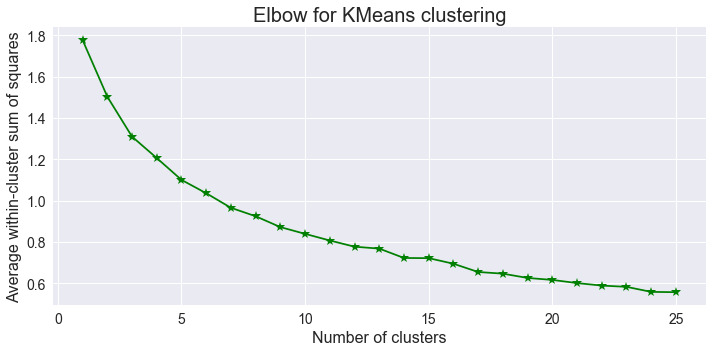

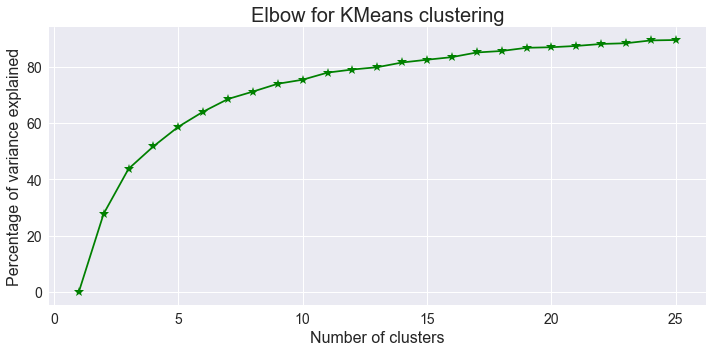

In [67]:
tsStdEnrol = standardizeTimeSeriesDF(dropoutsCut)
vals = tsStdEnrol.drop(['BNLONG', 'variable'], axis = 1)
    
# Elbow plots of cluster number variance for variable
print("Variable is: {0} ({1})".format(lab[i], var))
elbow(vals, range(1,26))


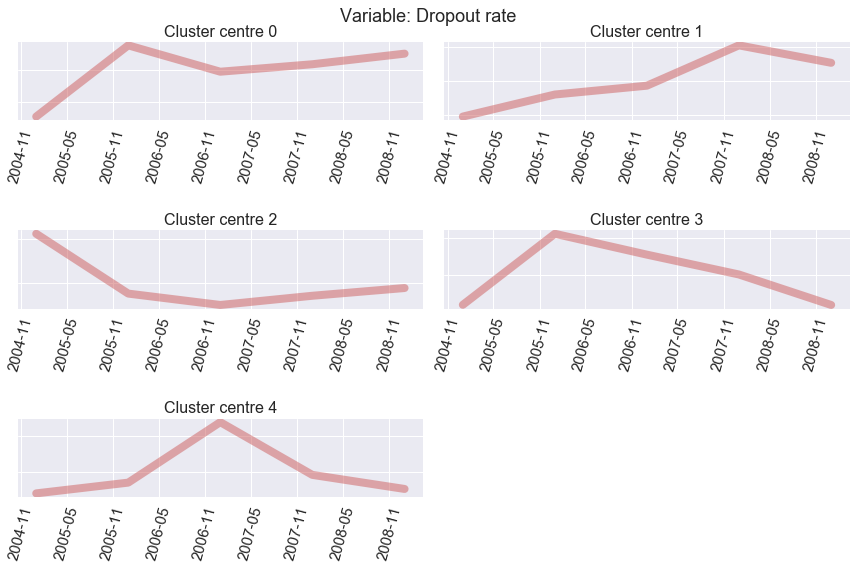

In [68]:
# Obtain time series of variable to standardize
tsStdEnrol = standardizeTimeSeriesDF(dropoutsCut)
vals = tsStdEnrol.drop(['BNLONG', 'variable'], axis = 1)
    
# Fit K-means clustering algo
km, kmFit = kMeansRun(vals, 5)
    
#creating a date range for required years
timeline = pd.date_range(vals.columns[0], str(pd.to_numeric(vals.columns[-1]*1)+1), freq='A')
    
fig = pl.figure(figsize=(12, 8))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(3, 2, (i + 1))
    ax.plot(timeline, Xc, lw = 8, alpha = 0.5, c='IndianRed')
    
    pl.title("\nCluster centre %d"%(i), fontsize = 16)
    plt.suptitle('Variable: {}\n'.format('Dropout rate'), fontsize=18)
    
    pl.xticks(fontsize = 15, rotation=75)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    plt.tight_layout()
    #print("Cluster centers" + " " + lab[j] )
    
clustDict[var] = {'BNLONG': list(tsStdEnrol['BNLONG']), 'cluster': km.labels_}

In [70]:
clustDictDropout =  clustDict 

____________________

In [47]:
clustDict = {}
numClustersFit = [5,5,5,5,5,5,5] # of clusters for each variable in variablesStd
variablesStd = ['ENRNUMAFM', 'ENRNUMHIS', 'ENRNUMWHT',  'ENRNUMSPD', 
                'ENRPCTAFM', 'ENRPCTHIS', 'ENRPCTWHT',  'HSOPCTDRPTOT' ]  # list of var to cluster   'ENRNUMPOV', 'ENRPCTSPD',
lab = ['Black student enrolment', 'Hispanic student enrolment', 
       'White student enrolment',  'Special Education enrolment',
       'Black enrolment pct', 'Hispanic enrolment pct', 
       'White enrolment pct',   'Drop out rate (w. discharges)']   # 'Poverty indicator enrolment', 'Special Ed enrolment pct',

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


    BNLONG   variable      2000     2001      2002      2003      2004  \
59    K001  ENRNUMAFM   2.60862  1.18574  0.830017  0.592869         0   
209   K002  ENRNUMAFM  0.998044  1.00481   1.24154    1.8266   1.48165   
359   K003  ENRNUMAFM   1.94262  1.82196   1.25038  0.755009  0.608938   
509   K004  ENRNUMAFM  -2.03891  -1.2677  -1.48193  -1.09632 -0.967789   
659   K005  ENRNUMAFM   1.46234  1.39641   1.39641   1.25798   1.07998   

          2005       2006       2007      2008      2009      2010      2011  \
59   -0.237148  -0.355722   0.711443 -0.355722 -0.592869 -0.830017  0.474295   
209   0.872916   0.176254   -0.28706 -0.611717 -0.855211 -0.980339 -0.949903   
359 -0.0833087  0.0691126 -0.0833087 -0.242081   -0.3818 -0.178572 -0.330993   
509   0.274711   0.017642   0.488935 -0.325117  0.488935   1.00307   1.00307   
659   0.361416  0.0845372  -0.139603 -0.350558 -0.482405 -0.278042 -0.370335   

         2012      2013      2014      2015      2016  
59  -0.118574 -0.5

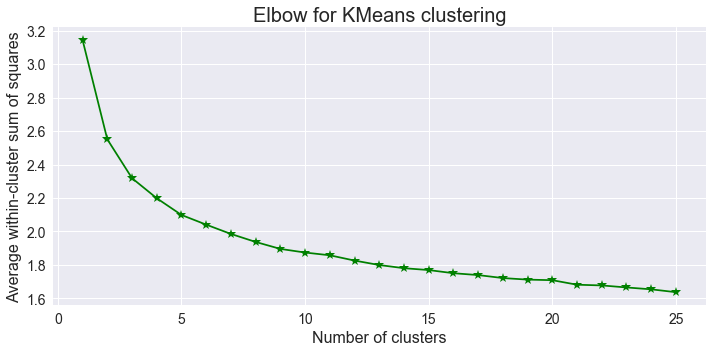

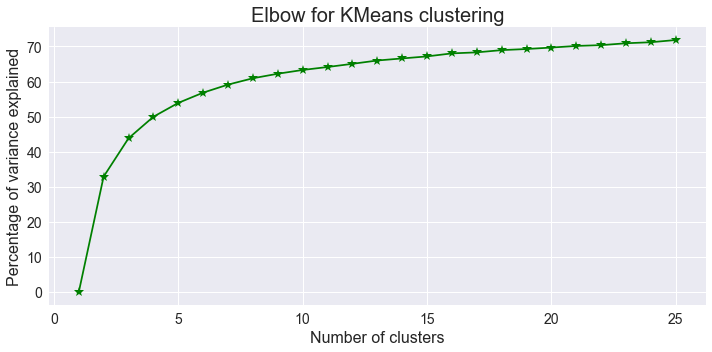

    BNLONG   variable      2000      2001      2002      2003      2004  \
77    K001  ENRNUMHIS  0.598472   1.42864  0.386513   0.31586 -0.478985   
227   K002  ENRNUMHIS  0.927996  0.551097   1.03568   2.00485   1.73564   
377   K003  ENRNUMHIS  -1.33359 -0.988347  -1.21851 -0.873265 -0.182776   
527   K004  ENRNUMHIS -0.452276 -0.756779 -0.756779  -1.51804  -1.28966   
677   K005  ENRNUMHIS -0.332606 -0.332606  0.307504   1.26767   1.37435   

          2005       2006       2007      2008       2009      2010      2011  \
77     -1.2385   -1.62709   -1.41514  -1.29149   -1.04421 -0.143384  0.174554   
227   0.335726  0.0665117 -0.0950167 -0.202702  -0.687287 -0.848816  -1.27956   
377  -0.988347  -0.873265  0.0473865 -0.873265  0.0473865  0.392631  0.622794   
527 -0.0716477  -0.452276  -0.376151 -0.985156  -0.376151  0.156729  0.613484   
677   0.414189  0.0941339  -0.652662 -0.866032    1.48104   1.26767  0.414189   

          2012      2013      2014      2015       2016  
77  

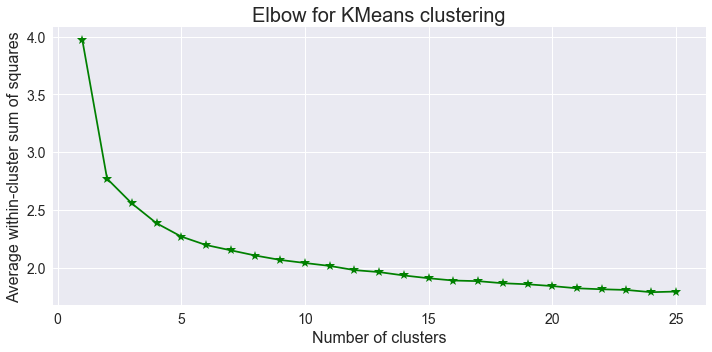

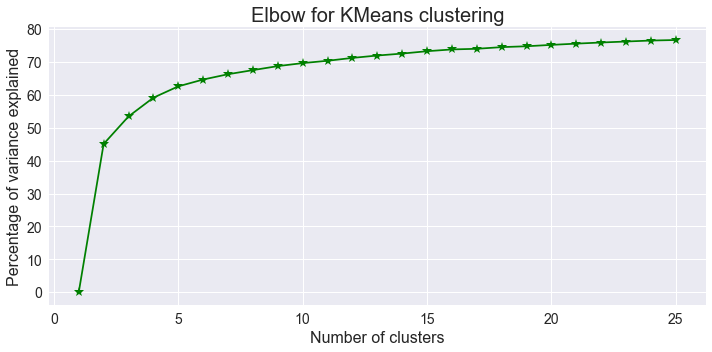

    BNLONG   variable      2000      2001       2002      2003      2004  \
86    K001  ENRNUMWHT  0.683792  0.560128  0.0654695 -0.923847 -0.429189   
236   K002  ENRNUMWHT    1.4215   1.09929   0.454879 -0.511739    1.7437   
386   K003  ENRNUMWHT -0.782177   1.16373  -0.133542 -0.133542  -0.45786   
536   K004  ENRNUMWHT  -1.21791 -0.460428  -0.839166 -0.965413  -1.09166   
686   K005  ENRNUMWHT   1.55228  0.496729 -0.0310456  0.232842  0.760616   

         2005      2006      2007       2008      2009      2010      2011  \
86   -1.17118 -0.800183 -0.923847 -0.0581951  -1.17118 -0.800183  0.931122   
236  0.132673 -0.189533  0.132673   -1.80056  -1.47836 -0.511739 -0.189533   
386  0.515092 -0.133542  -0.45786   -2.40376 -0.782177  -0.45786   0.83941   
536 -0.334181 -0.334181 -0.334181  -0.207935  0.549543   1.05453   1.43327   
686  -0.55882 -0.822707  -1.61437   -0.55882  -1.08659  0.496729    1.0245   

         2012       2013      2014      2015      2016  
86   0.807457 -0.

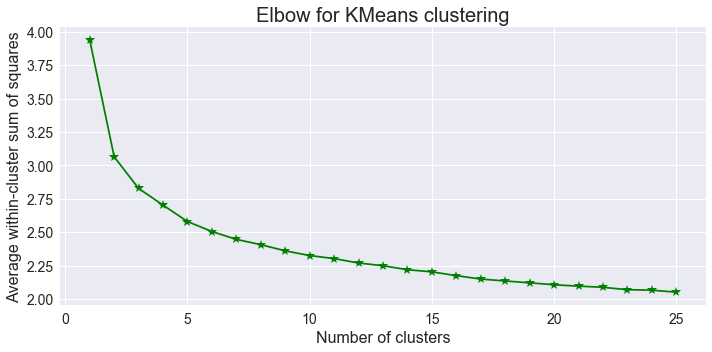

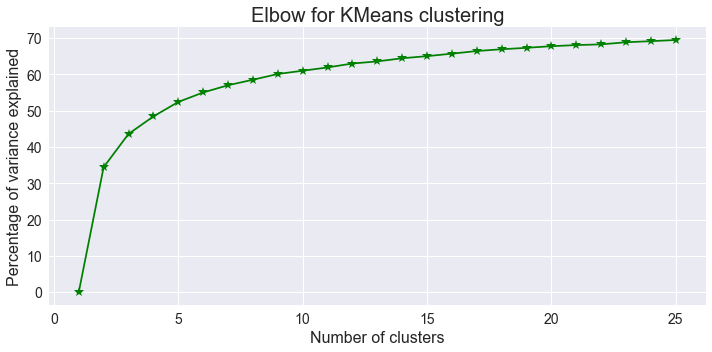

    BNLONG   variable      1996      1997      1998      1999      2000  \
84    K001  ENRNUMSPD -0.491584 -0.468334   -1.0496  -1.07285   -1.2356   
234   K002  ENRNUMSPD  -1.78312  -1.18362  -1.04528 -0.307434 -0.261319   
384   K003  ENRNUMSPD -0.479557  0.121679  -1.08079  -1.08079 -0.930484   
534   K004  ENRNUMSPD  -1.18613  -1.26681 -0.722245 -0.722245  -1.12563   
684   K005  ENRNUMSPD  -1.18619  -2.19948   1.26259   1.34703   1.00927   

         2001      2002      2003    ...          2007      2008       2009  \
84    -1.1426 -0.863594  -1.07285    ...    -0.0730733  0.275686   0.531442   
234  0.107602  0.522638   1.53717    ...       1.53717   1.53717   0.845444   
384 -0.930484 -0.780175 -0.930484    ...     -0.329248 -0.329248  -0.479557   
534  -0.82309 -0.984443  -1.02478    ...      0.205532 -0.298694   0.346716   
684   1.00927  0.249301  0.333742    ...      0.333742  0.418183 -0.0884618   

          2010      2011      2012      2013      2014      2015      2016

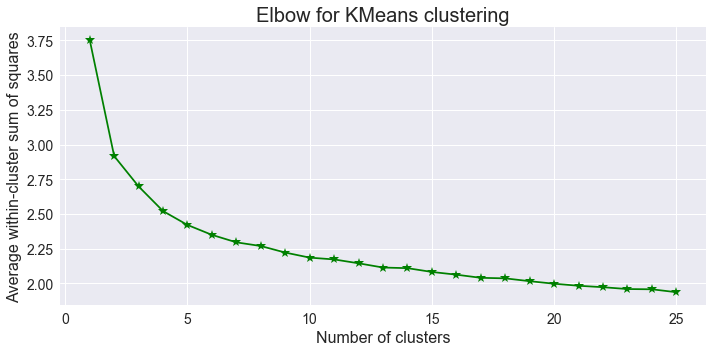

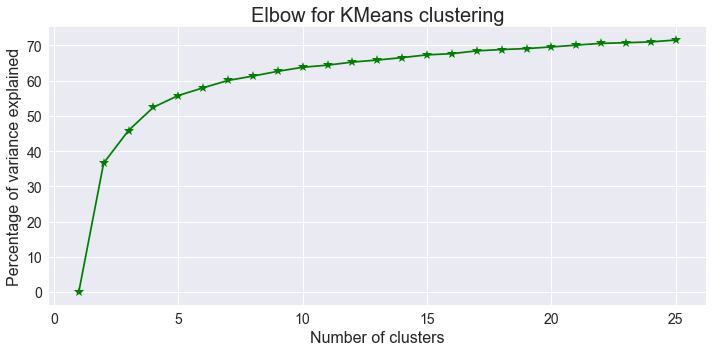

    BNLONG   variable      2000      2001      2002      2003       2004  \
87    K001  ENRPCTAFM   2.40299  0.931859  0.779098   0.61265  0.0977247   
237   K002  ENRPCTAFM   1.05841   1.39838   1.39658   1.15696     0.6375   
387   K003  ENRPCTAFM   1.27661   1.14653   1.12376  0.927785   0.752621   
537   K004  ENRPCTAFM -0.418384  0.369986  0.416671   1.45111    1.53114   
687   K005  ENRPCTAFM  0.908385   1.15137   1.18916  0.731004   0.681085   

          2005      2006       2007      2008      2009      2010      2011  \
87  -0.0397262 -0.102938    1.09499 -0.210233 -0.458682 -0.827372  0.459578   
237   0.968145  0.460928 -0.0127498 -0.119168  -0.58774  -1.09794 -0.593252   
387   0.519003  0.525747   0.348097  0.508801  0.080325 -0.173425 -0.616593   
537   0.624449  0.645294   0.856346  0.735621  0.473191  0.147349 -0.416015   
687   0.562778  0.672007    1.23568  0.697784  -0.94136 -0.762306 -0.543145   

         2012      2013      2014     2015      2016  
87  -0.170236

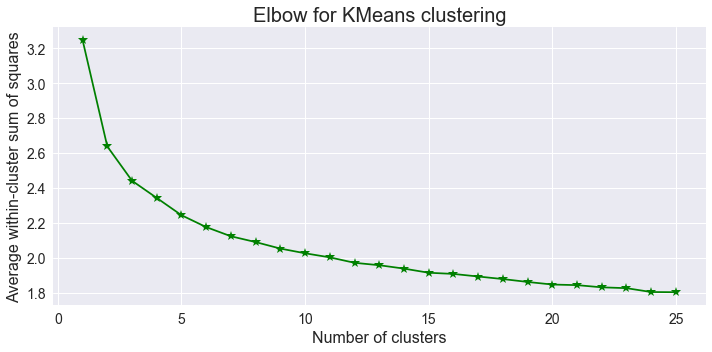

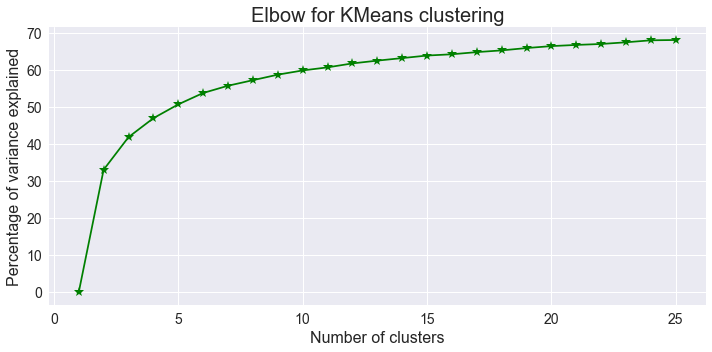

    BNLONG   variable      2000       2001       2002      2003      2004  \
88    K001  ENRPCTHIS  -1.22957 -0.0320811  0.0445468   1.09213  0.635986   
238   K002  ENRPCTHIS -0.833401   -1.16596  -0.991696 -0.865105 -0.775204   
388   K003  ENRPCTHIS  -1.37666   -1.23321   -1.16763 -0.868483 -0.510401   
538   K004  ENRPCTHIS    1.8102   0.341791   0.695604  -1.13447 -0.678831   
688   K005  ENRPCTHIS  -1.59856   -1.54214   -1.26206 -0.795635 -0.610838   

          2005      2006       2007      2008      2009       2010       2011  \
88    0.683305  0.896524    1.22684 -0.324633  0.790553   0.626748   0.127254   
238   -1.27606 -0.574728   0.200729   1.09974    1.0514    1.19247  0.0752591   
388  -0.580458 -0.604591 -0.0482046 -0.418083  0.130706  0.0915873   0.231963   
538  0.0111193  -0.46402  -0.705321   -1.1679  -0.92477  -0.634228  -0.168891   
688  -0.422068 -0.270747   -0.39537 -0.322994   1.36239   0.822446   0.443693   

         2012       2013      2014     2015      2

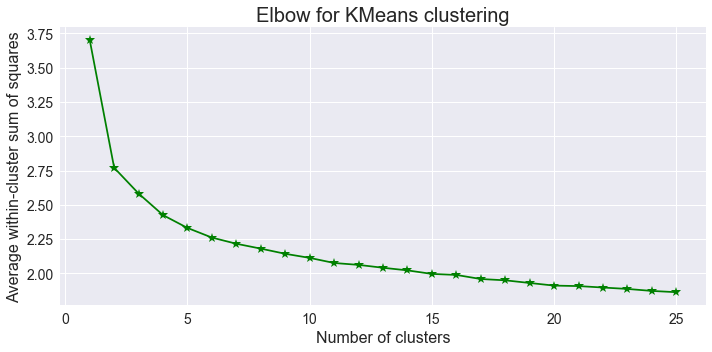

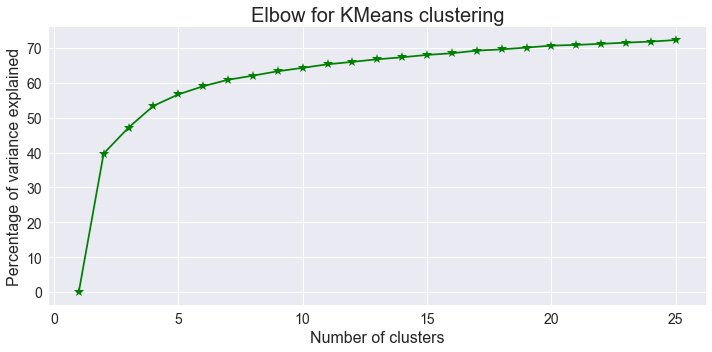

    BNLONG   variable      2000       2001       2002      2003      2004  \
90    K001  ENRPCTWHT  0.587911   0.345308  0.0275097  -1.07135 -0.331101   
240   K002  ENRPCTWHT -0.112866   -0.26756  -0.747727  -1.42187 -0.300737   
390   K003  ENRPCTWHT  -1.28993  -0.202794  -0.706383 -0.510534 -0.688859   
540   K004  ENRPCTWHT  -1.16762  0.0288761   -0.54469  -0.75217  -1.01619   
690   K005  ENRPCTWHT -0.116034  -0.640153  -0.930409 -0.753996 -0.363273   

         2005      2006      2007       2008      2009      2010      2011  \
90   -1.11905 -0.532153 -0.722972   0.267441  -1.14969 -0.863063   1.12337   
240 -0.753933 -0.524931  0.200073   -1.34584 -0.752261  0.738558   1.15956   
390  0.458677 -0.177907 -0.364934   -1.87268 -0.479152  -0.40519  0.635529   
540 -0.359026 -0.259914 -0.390746  0.0967931  0.805575   1.16348   1.48588   
690 -0.825494 -0.860263  -1.37629  -0.305021 -0.814278   0.42208   1.04158   

         2012      2013       2014      2015      2016  
90   0.9294

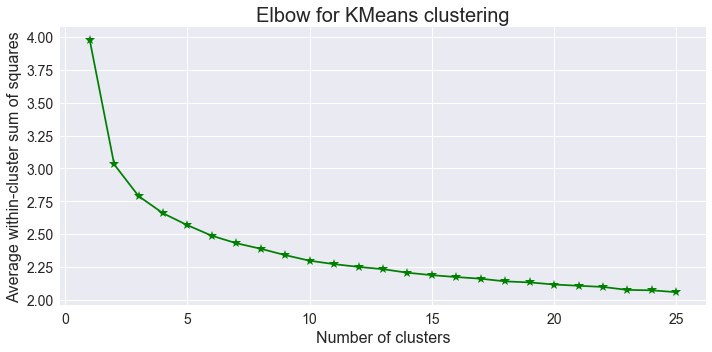

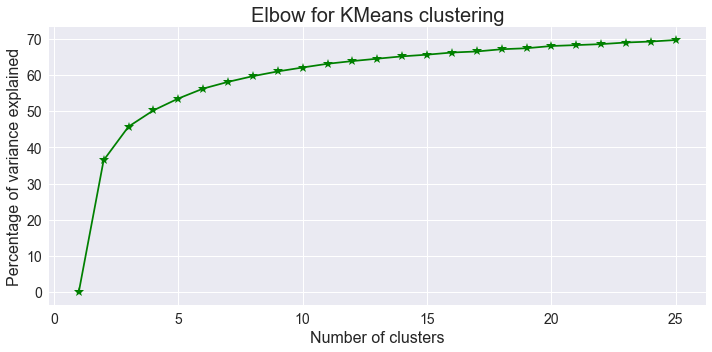

       BNLONG      variable      2000      2001      2002      2003      2004  \
83500    K670  HSOPCTDRPTOT -0.152518   2.30991  0.643757  -1.06255 -0.811091   
131500   M412  HSOPCTDRPTOT -0.502603 -0.502603 -0.502603 -0.502603 -0.502603   
131650   M413  HSOPCTDRPTOT   2.14027 -0.709938 -0.709938 -0.709938  0.401994   

            2005       2006      2007       2008  
83500  -0.610225  0.0110825 -0.245854 -0.0825159  
131500   1.90539  -0.502603 -0.502603    1.61283  
131650 -0.709938   0.842933  0.164494  -0.709938  
Variable is: Drop out rate (w. discharges) (HSOPCTDRPTOT)


ValueError: n_samples=3 should be >= n_clusters=4

In [48]:
## Fit elbow plots

for i, var in enumerate(variablesStd):
    
    # Obtain time series of variable to standardize
    tsStdEnrol = standardizeTimeSeries(var)
    print(tsStdEnrol.head())
    vals = tsStdEnrol.drop(['BNLONG', 'variable'], axis = 1)
    
    # Elbow plots of cluster number variance for variable
    print("Variable is: {0} ({1})".format(lab[i], var))
    elbow(vals, range(1,26))

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


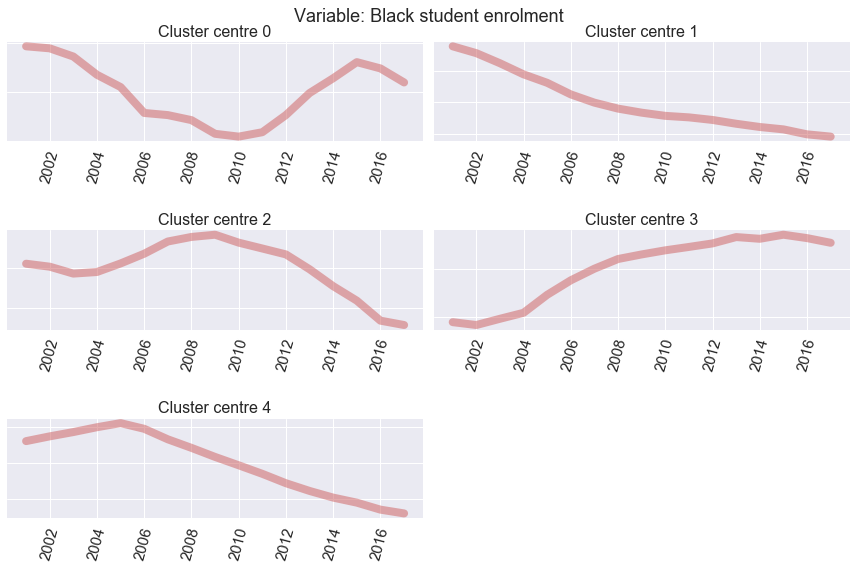

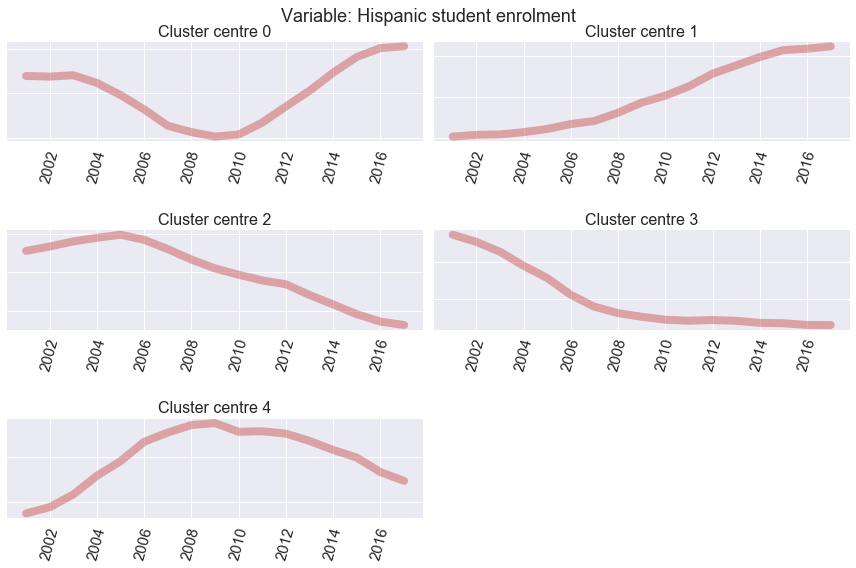

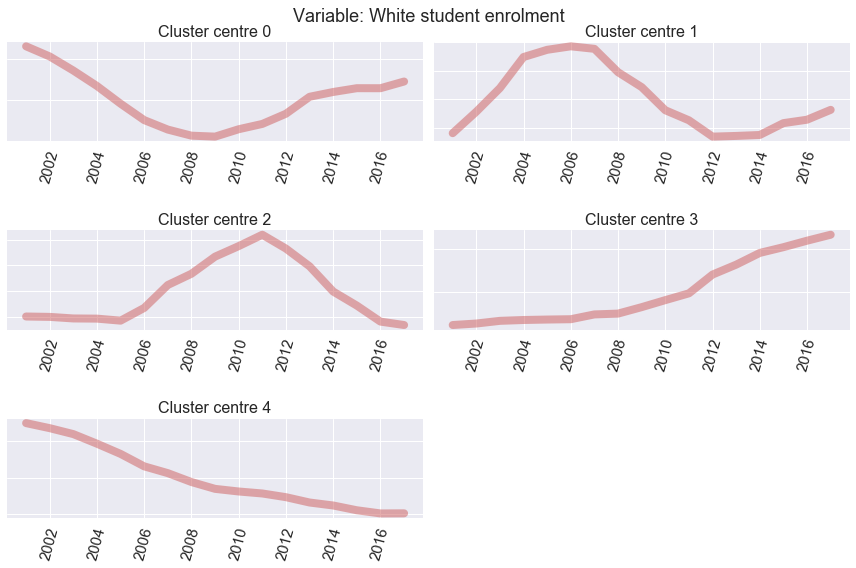

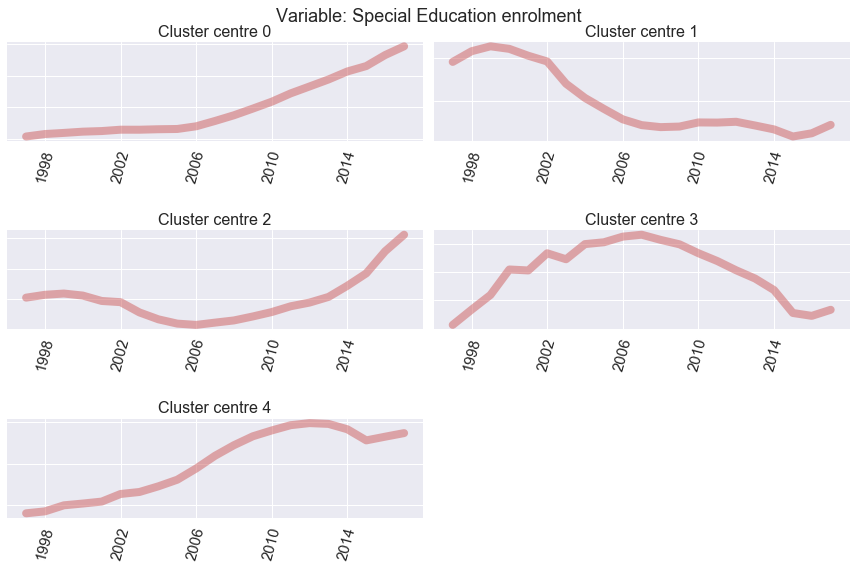

In [418]:
# Fit Kmeans clusters, plot cluster trends and store cluster values in dictionary

for j, var in enumerate(variablesStd):

    # Obtain time series of variable to standardize
    tsStdEnrol = standardizeTimeSeries(var)
    vals = tsStdEnrol.drop(['BNLONG', 'variable'], axis = 1)
    
    # Fit K-means clustering algo
    km, kmFit = kMeansRun(vals, numClustersFit[j])
    
    #creating a date range for required years
    timeline = pd.date_range(vals.columns[0], str(pd.to_numeric(vals.columns[-1]*1)+1), freq='A')
    
    fig = pl.figure(figsize=(12, 8))
    for i, Xc in enumerate(km.cluster_centers_):
        ax = fig.add_subplot(3, 2, (i + 1))
        ax.plot(timeline, Xc, lw = 8, alpha = 0.5, c='IndianRed')
    
        pl.title("\nCluster centre %d"%(i), fontsize = 16)
        plt.suptitle('Variable: {}\n'.format(lab[j]), fontsize=18)
    
        pl.xticks(fontsize = 15, rotation=75)
        ax.set_yticklabels(['' * len(ax.get_xticklabels())])
        plt.tight_layout()
    #print("Cluster centers" + " " + lab[j] )
    
    clustDict[var] = {'BNLONG': list(tsStdEnrol['BNLONG']), 'cluster': km.labels_}
    

In [419]:
clustDict

{'ENRNUMAFM': {'BNLONG': ['K001',
   'K002',
   'K003',
   'K004',
   'K005',
   'K006',
   'K007',
   'K008',
   'K009',
   'K010',
   'K011',
   'K012',
   'K013',
   'K014',
   'K015',
   'K016',
   'K017',
   'K018',
   'K020',
   'K021',
   'K023',
   'K024',
   'K025',
   'K026',
   'K028',
   'K029',
   'K030',
   'K031',
   'K032',
   'K034',
   'K035',
   'K036',
   'K038',
   'K039',
   'K040',
   'K041',
   'K044',
   'K045',
   'K046',
   'K048',
   'K050',
   'K051',
   'K052',
   'K053',
   'K054',
   'K056',
   'K057',
   'K058',
   'K059',
   'K061',
   'K062',
   'K065',
   'K067',
   'K068',
   'K071',
   'K073',
   'K075',
   'K077',
   'K078',
   'K081',
   'K084',
   'K086',
   'K088',
   'K089',
   'K090',
   'K091',
   'K092',
   'K093',
   'K094',
   'K095',
   'K096',
   'K097',
   'K098',
   'K099',
   'K100',
   'K101',
   'K102',
   'K104',
   'K105',
   'K106',
   'K107',
   'K108',
   'K109',
   'K110',
   'K112',
   'K113',
   'K114',
   'K115',
   'K116'

## Let's assess school performance

In [83]:
performClustDict = {}
numClustersFit = [3, 4] # of clusters for each variable in variablesStd
variablesStd = [ 'STCELAPCTL34TOT', 'STCMTHPCTL34TOT' ]  # list of var to cluster   '
lab = ['ELA STATE TEST, NYC: PERCENT AT LEVEL THREE OR FOUR, ALL GRADES', 
       'MATH STATE TEST, NYC: PERCENT AT LEVEL THREE OR FOUR, ALL GRADES' ] 

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


     BNLONG         variable      1999      2000       2001      2002  \
142    K001  STCELAPCTL34TOT -0.879241 -0.583348  0.0156536  0.224943   
292    K002  STCELAPCTL34TOT  -0.64359 -0.173549  -0.483349  -1.45548   
442    K003  STCELAPCTL34TOT -0.541146 -0.274835  -0.102093 -0.533949   
892    K006  STCELAPCTL34TOT  0.225633 -0.366292  -0.160405 -0.153971   
1042   K007  STCELAPCTL34TOT  -1.00206 -0.878669  -0.527004 -0.132153   

          2003      2004       2005        2006      2007      2008     2009  \
142    0.23216  0.181642    1.35078     1.14149  0.636306  0.867247  1.84153   
292  -0.953389  -0.99612 -0.0453564  0.00805728  0.381953   1.16179  2.83898   
442  -0.138081 -0.310823    1.31583    0.660851  0.423331   1.37341  2.38827   
892   0.289973  0.354312   0.939803     0.74035  0.869029   1.67328  1.37088   
1042 -0.144492  0.305885   0.996875     1.78041  0.688397  0.959857  1.73105   

          2010      2011       2012      2013      2014     2015      2016  
142

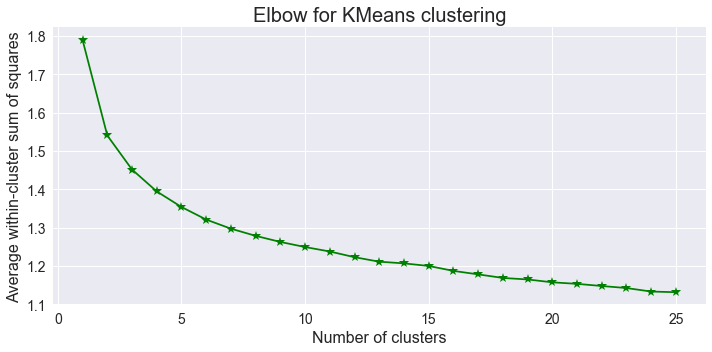

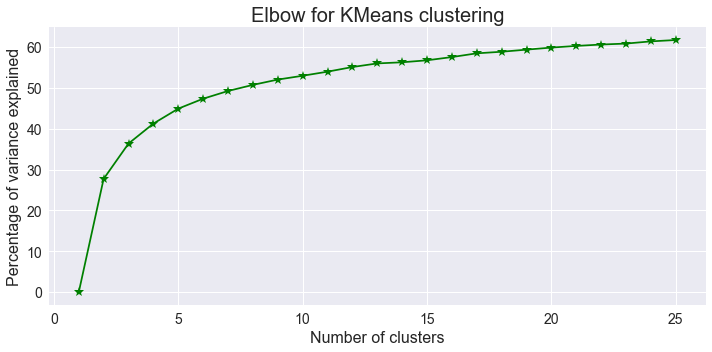

     BNLONG         variable        1999      2000      2001      2002  \
149    K001  STCMTHPCTL34TOT     -1.1468 -0.694647  -0.64496 -0.302118   
299    K002  STCMTHPCTL34TOT   -0.880068 -0.936516 -0.922404 -0.865956   
449    K003  STCMTHPCTL34TOT    -0.51037 -0.771968 -0.643734 -0.464206   
899    K006  STCMTHPCTL34TOT -0.00575022 -0.775276  -0.73282 -0.419702   
1049   K007  STCMTHPCTL34TOT   -0.719059  -0.74247 -0.590296 -0.352279   

           2003       2004      2005       2006      2007     2008     2009  \
149   -0.133182  -0.307087  0.537594   0.920185   1.37731  1.56115   1.7748   
299    -1.02824  -0.746006 -0.379097  0.0442585  0.538174  1.37783  2.28804   
449   -0.264161   -0.27442  0.910464   0.469339   1.08999  2.02354  2.10048   
899   -0.122506 -0.0163644  0.408202   0.806232    1.3847  1.61291  1.78273   
1049 -0.0830463   0.502241     1.029    1.16167   1.24751  1.30994  1.56356   

          2010      2011      2012      2013      2014      2015      2016  
149

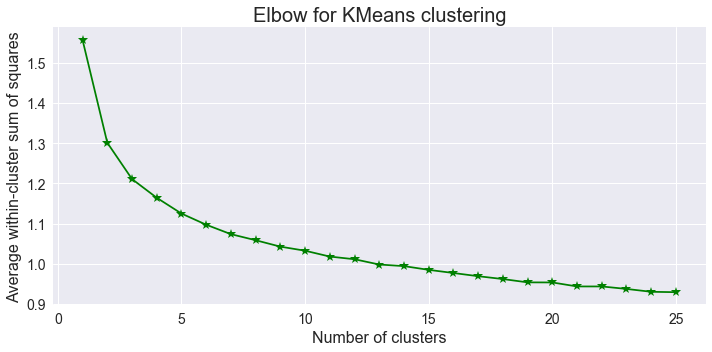

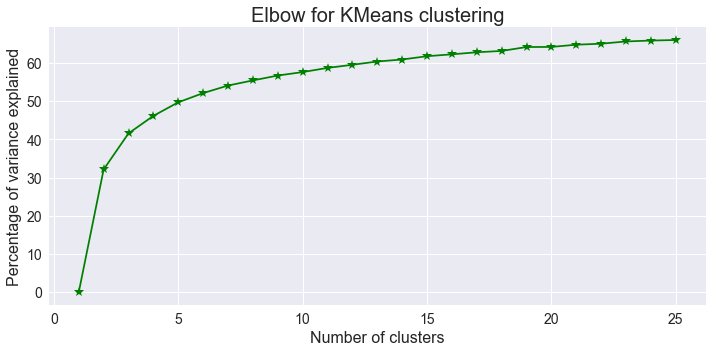

In [84]:
## Fit elbow plots

for i, var in enumerate(variablesStd):
    
    # Obtain time series of variable to standardize
    tsStdEnrol = standardizeTimeSeries(var)
    print(tsStdEnrol.head())
    vals = tsStdEnrol.drop(['BNLONG', 'variable'], axis = 1)
    
    # Elbow plots of cluster number variance for variable
    print("Variable is: {0} ({1})".format(lab[i], var))
    elbow(vals, range(1,26))

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


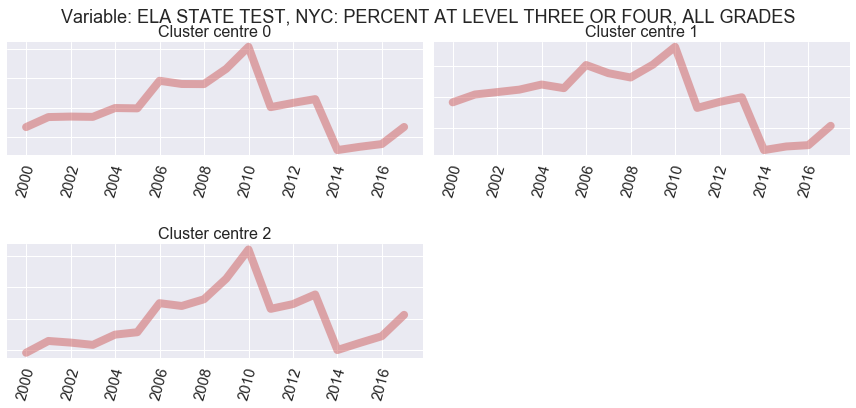

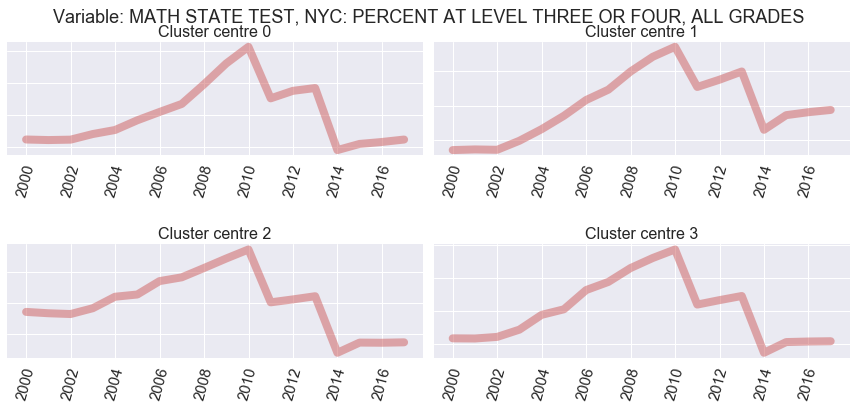

In [85]:
# Fit Kmeans clusters, plot cluster trends and store cluster values in dictionary

for j, var in enumerate(variablesStd):

    # Obtain time series of variable to standardize
    tsStdEnrol = standardizeTimeSeries(var)
    vals = tsStdEnrol.drop(['BNLONG', 'variable'], axis = 1)
    
    # Fit K-means clustering algo
    km, kmFit = kMeansRun(vals, numClustersFit[j])
    
    #creating a date range for required years
    timeline = pd.date_range(vals.columns[0], str(pd.to_numeric(vals.columns[-1]*1)+1), freq='A')
    
    fig = pl.figure(figsize=(12, 8))
    for i, Xc in enumerate(km.cluster_centers_):
        ax = fig.add_subplot(3, 2, (i + 1))
        ax.plot(timeline, Xc, lw = 8, alpha = 0.5, c='IndianRed')
    
        pl.title("\nCluster centre %d"%(i), fontsize = 16)
        plt.suptitle('Variable: {}\n'.format(lab[j]), fontsize=18)
    
        pl.xticks(fontsize = 15, rotation=75)
        ax.set_yticklabels(['' * len(ax.get_xticklabels())])
        plt.tight_layout()
    #print("Cluster centers" + " " + lab[j] )
    
    performClustDict[var] = {'BNLONG': list(tsStdEnrol['BNLONG']), 'cluster': km.labels_}

## Let's explore enrolment of Black students

In [379]:
# Enrolment of Black students is 'ENRNUMAFM'

tsStdEnrol = standardizeTimeSeries('ENRNUMAFM')

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [380]:
print(tsStdEnrol.head())

    BNLONG   variable      2000     2001      2002      2003      2004  \
59    K001  ENRNUMAFM   2.60862  1.18574  0.830017  0.592869         0   
205   K002  ENRNUMAFM  0.998044  1.00481   1.24154    1.8266   1.48165   
351   K003  ENRNUMAFM   1.94262  1.82196   1.25038  0.755009  0.608938   
497   K004  ENRNUMAFM  -2.03891  -1.2677  -1.48193  -1.09632 -0.967789   
643   K005  ENRNUMAFM   1.46234  1.39641   1.39641   1.25798   1.07998   

          2005       2006       2007      2008      2009      2010      2011  \
59   -0.237148  -0.355722   0.711443 -0.355722 -0.592869 -0.830017  0.474295   
205   0.872916   0.176254   -0.28706 -0.611717 -0.855211 -0.980339 -0.949903   
351 -0.0833087  0.0691126 -0.0833087 -0.242081   -0.3818 -0.178572 -0.330993   
497   0.274711   0.017642   0.488935 -0.325117  0.488935   1.00307   1.00307   
643   0.361416  0.0845372  -0.139603 -0.350558 -0.482405 -0.278042 -0.370335   

         2012      2013      2014      2015      2016  
59  -0.118574 -0.5

In [381]:
vals = tsStdEnrol.drop(['BNLONG', 'variable'], axis = 1)

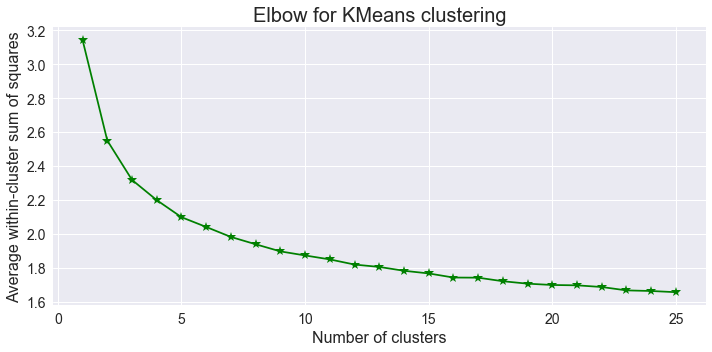

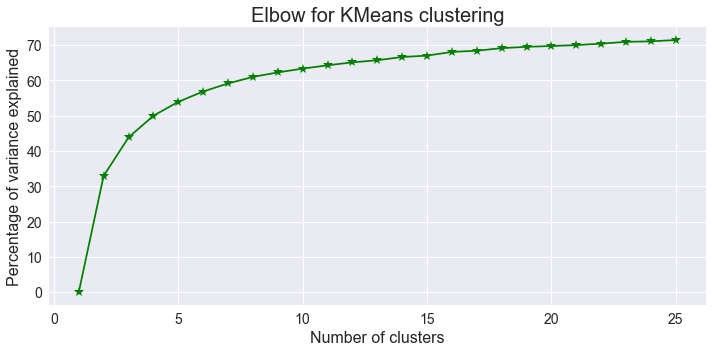

In [382]:
elbow(vals, range(1,26))

In [383]:
km, kmFit = kMeansRun(vals,5)

Cluster centers


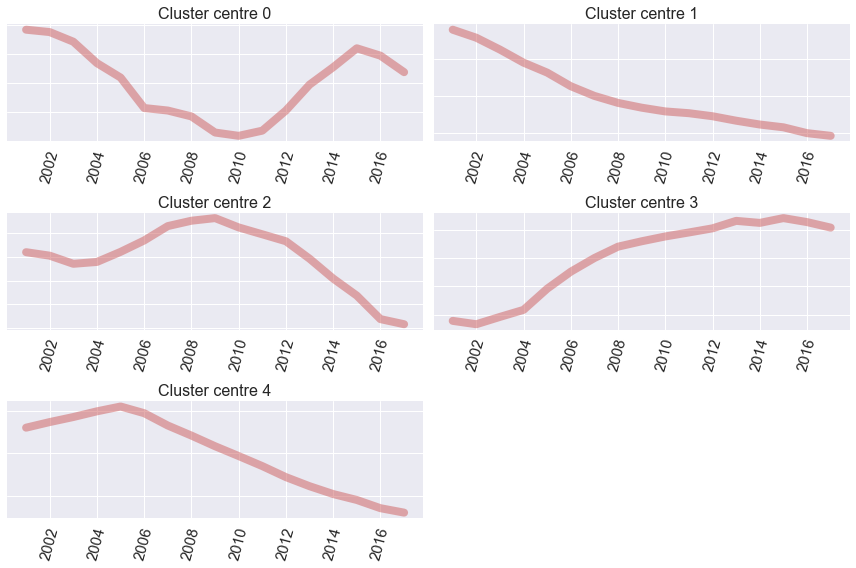

In [384]:
fig = pl.figure(figsize=(12, 8))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(3, 2, (i + 1))
    ax.plot(timeline, Xc, lw = 8, alpha = 0.5, c='IndianRed')
    
    pl.title("Cluster centre %d"%(i), fontsize = 16)
    
    
    pl.xticks(fontsize = 15, rotation=75)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    plt.tight_layout()
print("Cluster centers")

In [385]:
tsStdEnrol['ClustLabel'] = km.labels_

In [387]:
Blk = 'Blk'

In [388]:
tsStdEnrol[str(Blk) + 'ClustLabel'] = 0

In [389]:
tsStdEnrol.head()

,BNLONG,variable,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,ClustLabel,BlkClustLabel
59,K001,ENRNUMAFM,2.60862,1.18574,0.830017,0.592869,0,-0.237148,-0.355722,0.711443,...,-0.592869,-0.830017,0.474295,-0.118574,-0.592869,-0.474295,-1.30431,-1.54146,1,0
205,K002,ENRNUMAFM,0.998044,1.00481,1.24154,1.8266,1.48165,0.872916,0.176254,-0.28706,...,-0.855211,-0.980339,-0.949903,-0.841683,-0.760519,-0.730082,-0.78081,-0.804483,1,0
351,K003,ENRNUMAFM,1.94262,1.82196,1.25038,0.755009,0.608938,-0.0833087,0.0691126,-0.0833087,...,-0.3818,-0.178572,-0.330993,-0.458011,-0.794608,-1.06135,-1.25187,-1.58212,1,0
497,K004,ENRNUMAFM,-2.03891,-1.2677,-1.48193,-1.09632,-0.967789,0.274711,0.017642,0.488935,...,0.488935,1.00307,1.00307,0.960228,0.960228,0.874539,0.488935,0.61747,3,0
643,K005,ENRNUMAFM,1.46234,1.39641,1.39641,1.25798,1.07998,0.361416,0.0845372,-0.139603,...,-0.482405,-0.278042,-0.370335,-0.587882,-0.798838,-1.12846,-1.36578,-1.53718,1,0


In [364]:
for j in range(nc):
    print("Schools in cluster", j)
    print(list(vals.BNLONG[km.labels_ == j]))
    print("\n")


Schools in cluster 0
['K011', 'K088', 'K127', 'K131', 'K132', 'K133', 'K152', 'K153', 'K157', 'K169', 'K196', 'K199', 'K229', 'K231', 'K372', 'M034', 'M057', 'M063', 'M072', 'M094', 'M098', 'M169', 'M223', 'M226', 'M250', 'M258', 'M411', 'M468', 'M515', 'Q009', 'Q011', 'Q018', 'Q036', 'Q046', 'Q048', 'Q073', 'Q075', 'Q079', 'Q084', 'Q094', 'Q097', 'Q107', 'Q108', 'Q130', 'Q149', 'Q159', 'Q162', 'Q163', 'Q166', 'Q169', 'Q176', 'Q182', 'Q185', 'Q190', 'Q191', 'Q200', 'Q203', 'Q213', 'Q217', 'Q221', 'Q235', 'Q550', 'R003', 'R005', 'R008', 'R037', 'R046', 'R048', 'R050', 'R055', 'R069', 'R605', 'X004', 'X023', 'X030', 'X037', 'X046', 'X049', 'X054', 'X055', 'X059', 'X062', 'X087', 'X109', 'X121', 'X150', 'X153', 'X157', 'X181', 'X186', 'X204', 'X205', 'X396', 'X495']


Schools in cluster 1
['K001', 'K002', 'K003', 'K005', 'K006', 'K007', 'K008', 'K009', 'K012', 'K013', 'K014', 'K015', 'K016', 'K020', 'K021', 'K023', 'K025', 'K026', 'K028', 'K032', 'K035', 'K036', 'K038', 'K040', 'K044', 'K

_______________________

In [ ]:
tsBlackEnrolment = f1[f1['variable']=='ENRNUMAFM']

In [36]:
tsBlackEnrolment.head()

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
59,K001,ENRNUMAFM,NaN,NaN,NaN,NaN,45,33,30,28,...,29,20,18,16,27,22,18,19,12,10
205,K002,ENRNUMAFM,NaN,NaN,NaN,NaN,917,919,989,1162,...,537,441,369,332,341,373,397,406,391,384
351,K003,ENRNUMAFM,NaN,NaN,NaN,NaN,861,842,752,674,...,542,517,495,527,503,483,430,388,358,306
497,K004,ENRNUMAFM,NaN,NaN,NaN,NaN,153,171,166,175,...,212,193,212,224,224,223,223,221,212,215
643,K005,ENRNUMAFM,NaN,NaN,NaN,NaN,639,629,629,608,...,396,364,344,375,361,328,296,246,210,184


In [37]:
## Remove columns where all NaN
tsBlackEnrolment.dropna(axis=1, how='all', inplace=True)

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
## Remove rows where any NaN
tsBlackEnrolment.dropna(axis=0, how='any',inplace=True)

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
tsBlackEnrolment.head()

,BNLONG,variable,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
59,K001,ENRNUMAFM,45,33,30,28,23,21,20,29,20,18,16,27,22,18,19,12,10
205,K002,ENRNUMAFM,917,919,989,1162,1060,880,674,537,441,369,332,341,373,397,406,391,384
351,K003,ENRNUMAFM,861,842,752,674,651,542,566,542,517,495,527,503,483,430,388,358,306
497,K004,ENRNUMAFM,153,171,166,175,178,207,201,212,193,212,224,224,223,223,221,212,215
643,K005,ENRNUMAFM,639,629,629,608,581,472,430,396,364,344,375,361,328,296,246,210,184


In [40]:
# new dictionary colUpdate with all column names as strings
colUpdate = { 2000 : u'2000',
              2001 : u'2001',     
              2002 : u'2002',
              2003 : u'2003',     
              2004 : u'2004',
              2005 : u'2005',
              2006 : u'2006',
              2007 : u'2007',     
              2008 : u'2008',
              2009 : u'2009',     
              2010 : u'2010',
              2011 : u'2011',
              2012 : u'2012',
              2013 : u'2013', 
              2014 : u'2014',
              2015 : u'2015',
              2016 : u'2016'}
tsBlackEnrolment.rename(columns = colUpdate, inplace=True)
tsBlackEnrolment.columns

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [41]:
tsBlackEnrolment['popmean'] = tsBlackEnrolment['2016']
tsBlackEnrolment['stdev'] = tsBlackEnrolment['2016']
tsBlackEnrolment.head()

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BNLONG,variable,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,popmean,stdev
59,K001,ENRNUMAFM,45,33,30,28,23,21,20,29,...,18,16,27,22,18,19,12,10,10,10
205,K002,ENRNUMAFM,917,919,989,1162,1060,880,674,537,...,369,332,341,373,397,406,391,384,384,384
351,K003,ENRNUMAFM,861,842,752,674,651,542,566,542,...,495,527,503,483,430,388,358,306,306,306
497,K004,ENRNUMAFM,153,171,166,175,178,207,201,212,...,212,224,224,223,223,221,212,215,215,215
643,K005,ENRNUMAFM,639,629,629,608,581,472,430,396,...,344,375,361,328,296,246,210,184,184,184


In [285]:
tsBlackEnrolment['popmean'] = tsBlackEnrolment.iloc[:,2:-2].T.mean()

59          23.000000
205        621.882353
351        555.117647
497        200.588235
643        417.176471
789        606.823529
935        143.588235
1081       164.000000
1227       465.882353
1373        76.294118
1519       512.352941
1665       385.764706
1811       416.941176
1957       564.588235
2103       175.764706
2249        88.882353
2395        19.941176
2541        34.000000
2833       392.705882
2979       663.352941
3271       183.294118
3417        19.294118
3563       398.705882
3709       311.764706
4001       227.352941
4147        86.705882
4293         9.588235
4439        21.823529
4585       130.588235
4877        11.352941
             ...     
259209      45.411765
260815      78.294118
262421     253.823529
262567      73.588235
264611      87.588235
267969     122.588235
268115     206.352941
268407      70.117647
269575     732.588235
273663    1135.529412
274247     135.117647
275561    1427.705882
278043     170.000000
278627     125.588235
278919    

In [42]:
# append on mean and standard deviation to the datasets (BRUTE FORCE)

# Calculate the mean and standard deviation of the school totals over time
## in preparation for clustering
tsBlackEnrolment['popmean'] = tsBlackEnrolment['2016']
tsBlackEnrolment['stdev'] = tsBlackEnrolment['2016']

for i in tsBlackEnrolment.index:
    tsBlackEnrolment['popmean'].loc[i] = tsBlackEnrolment.loc[i].drop(['BNLONG', 'variable','popmean','stdev']).mean() 
    tsBlackEnrolment['stdev'].loc[i] = tsBlackEnrolment.loc[i].drop(['BNLONG', 'variable','popmean','stdev']).std()

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__ma

In [55]:
tsBlackEnrolment.shape

(991, 21)

In [56]:
## Standardise the data

tsBlackEnrolment.columns

Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'popmean', 'stdev'],
      dtype='object')

In [57]:
tsBlackEnrolStandard = tsBlackEnrolment.copy()
columnsStandard = ['2000', '2001', '2002', '2003', '2004', '2005',
                   '2006', '2007', '2008', '2009', '2010', '2011', 
                   '2012', '2013', '2014', '2015', '2016']

In [58]:
for i in columnsStandard:
    tsBlackEnrolStandard[i] = (tsBlackEnrolment[i] - tsBlackEnrolment.popmean) / tsBlackEnrolment.stdev

In [59]:
tsBlackEnrolStandard.columns

Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'popmean', 'stdev'],
      dtype='object')

In [60]:
vals = tsBlackEnrolStandard.drop(['BNLONG', 'variable', 'popmean', 'stdev'], axis = 1)

In [61]:
# Check if as expected, means are zero and standard devations are 1

print("Expect means of each row to be = 0\n", vals.mean(1)[:10])
print("Expect stds of each row to be = 1\n", vals.std(1)[:10])

Expect means of each row to be = 0
 59      0.000000e+00
205    -5.224579e-17
351    -3.918434e-17
497    -2.089832e-16
643    -5.224579e-17
789    -4.702121e-16
935    -2.089832e-16
1081    3.265362e-17
1227    6.530724e-17
1373   -3.836800e-17
dtype: float64
Expect stds of each row to be = 1
 59      1.0
205     1.0
351     1.0
497     1.0
643     1.0
789     1.0
935     1.0
1081    1.0
1227    1.0
1373    1.0
dtype: float64


In [63]:
vals = tsBlackEnrolStandard[columnsStandard]

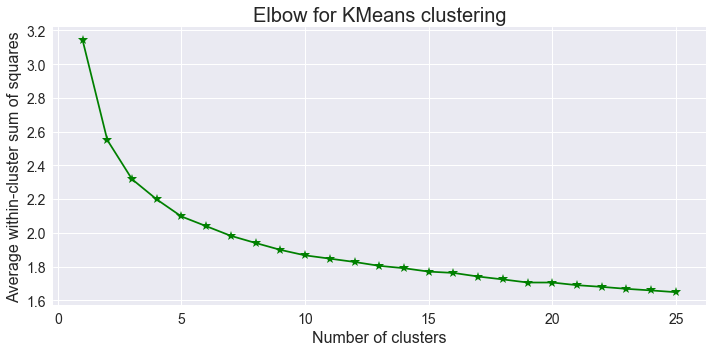

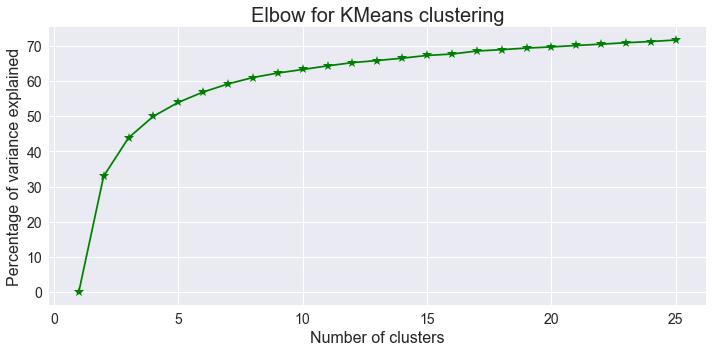

In [64]:
elbow(vals, range(1,26))

Fit 5 clusters

In [65]:

###############################################################################
# Fit K-means algorithm for selected number of clusters (again)


#creating a date range: 2000-2016
timeline = pd.date_range('2000', '2017', freq='A')

nc = 5

km = KMeans(n_clusters=nc, random_state=888)

km.fit(vals)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=888, tol=0.0001, verbose=0)

Cluster centers


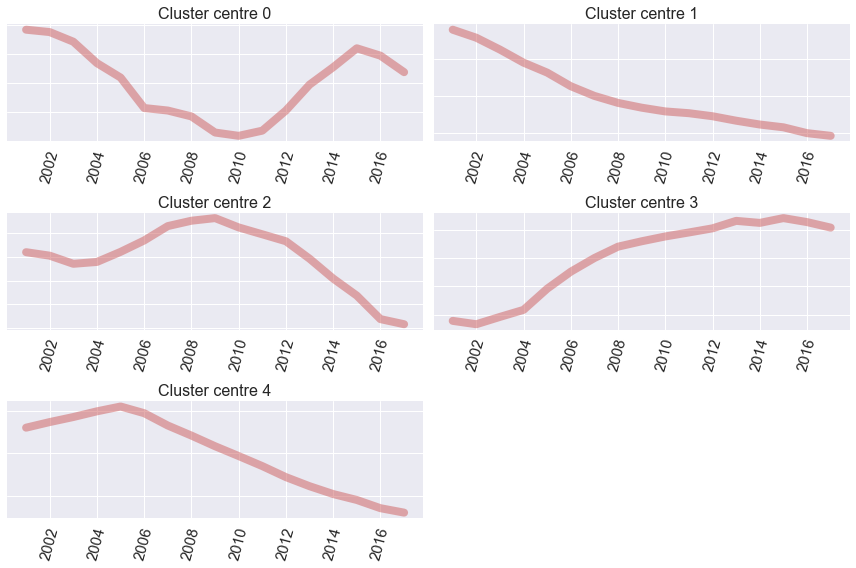

In [66]:
fig = pl.figure(figsize=(12, 8))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(3, 2, (i + 1))
    ax.plot(timeline, Xc, lw = 8, alpha = 0.5, c='IndianRed')
    
    pl.title("Cluster centre %d"%(i), fontsize = 16)
    
    
    pl.xticks(fontsize = 15, rotation=75)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    plt.tight_layout()
print("Cluster centers")

In [67]:
tsBlackEnrolStandard['ClustLabel'] = km.labels_

In [68]:
tsBlackEnrolStandard.columns

Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'popmean', 'stdev', 'ClustLabel'],
      dtype='object')

In [69]:
vals = tsBlackEnrolStandard.drop(['variable', 'popmean', 'stdev'], axis = 1)

In [70]:

for j in range(nc):
    print("Schools in cluster", j)
    print(list(vals.BNLONG[km.labels_ == j]))
    print("\n")

#clustersdf = gp.GeoDataFrame()
#clustersdf['precinct'] = vals.PCT
#clustersdf['cluster'] = km.labels_

Schools in cluster 0
['K011', 'K088', 'K127', 'K131', 'K132', 'K133', 'K152', 'K153', 'K157', 'K169', 'K196', 'K199', 'K229', 'K231', 'K372', 'M034', 'M057', 'M063', 'M072', 'M094', 'M098', 'M169', 'M223', 'M226', 'M250', 'M258', 'M411', 'M468', 'M515', 'Q009', 'Q011', 'Q018', 'Q036', 'Q046', 'Q048', 'Q073', 'Q075', 'Q079', 'Q084', 'Q094', 'Q097', 'Q107', 'Q108', 'Q130', 'Q149', 'Q159', 'Q162', 'Q163', 'Q166', 'Q169', 'Q176', 'Q182', 'Q185', 'Q190', 'Q191', 'Q200', 'Q203', 'Q213', 'Q217', 'Q221', 'Q235', 'Q550', 'R003', 'R005', 'R008', 'R037', 'R046', 'R048', 'R050', 'R055', 'R069', 'R605', 'X004', 'X023', 'X030', 'X037', 'X046', 'X049', 'X054', 'X055', 'X059', 'X062', 'X087', 'X109', 'X121', 'X150', 'X153', 'X157', 'X181', 'X186', 'X204', 'X205', 'X396', 'X495']


Schools in cluster 1
['K001', 'K002', 'K003', 'K005', 'K006', 'K007', 'K008', 'K009', 'K012', 'K013', 'K014', 'K015', 'K016', 'K020', 'K021', 'K023', 'K025', 'K026', 'K028', 'K032', 'K035', 'K036', 'K038', 'K040', 'K044', 'K

In [279]:
tsBlackEnrolStandard.to_csv('bySchoolBlackEnrolClusters.csv', sep=',')

_______________

## Hispanic student enrolment

In [287]:
tsHispanicEnrolment = f1[f1['variable']=='ENRNUMHIS']

In [288]:
tsHispanicEnrolment.head()

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
77,K001,ENRNUMHIS,NaN,NaN,NaN,NaN,1108,1155,1096,1092,...,994,1001,1015,1066,1084,1107,1146,1111,1115,1137
223,K002,ENRNUMHIS,NaN,NaN,NaN,NaN,79,72,81,99,...,60,58,49,46,38,34,45,48,55,61
369,K003,ENRNUMHIS,NaN,NaN,NaN,NaN,29,32,30,33,...,41,33,41,44,46,52,53,50,49,53
515,K004,ENRNUMHIS,NaN,NaN,NaN,NaN,62,58,58,48,...,63,55,63,70,76,86,83,75,93,85
661,K005,ENRNUMHIS,NaN,NaN,NaN,NaN,50,50,56,65,...,47,45,67,65,57,53,47,49,43,32


In [289]:
## Remove columns where all NaN
tsHispanicEnrolment.dropna(axis=1, how='all', inplace=True)

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [290]:
## Remove rows where any NaN
tsHispanicEnrolment.dropna(axis=0, how='any',inplace=True)

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [291]:
tsHispanicEnrolment.head()

,BNLONG,variable,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
77,K001,ENRNUMHIS,1108,1155,1096,1092,1047,1004,982,994,1001,1015,1066,1084,1107,1146,1111,1115,1137
223,K002,ENRNUMHIS,79,72,81,99,94,68,63,60,58,49,46,38,34,45,48,55,61
369,K003,ENRNUMHIS,29,32,30,33,39,32,33,41,33,41,44,46,52,53,50,49,53
515,K004,ENRNUMHIS,62,58,58,48,51,67,62,63,55,63,70,76,86,83,75,93,85
661,K005,ENRNUMHIS,50,50,56,65,66,57,54,47,45,67,65,57,53,47,49,43,32


In [292]:
# new dictionary colUpdate with all column names as strings
colUpdate = { 2000 : u'2000',
              2001 : u'2001',     
              2002 : u'2002',
              2003 : u'2003',     
              2004 : u'2004',
              2005 : u'2005',
              2006 : u'2006',
              2007 : u'2007',     
              2008 : u'2008',
              2009 : u'2009',     
              2010 : u'2010',
              2011 : u'2011',
              2012 : u'2012',
              2013 : u'2013', 
              2014 : u'2014',
              2015 : u'2015',
              2016 : u'2016'}
tsHispanicEnrolment.rename(columns = colUpdate, inplace=True)
tsHispanicEnrolment.columns

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [293]:
tsHispanicEnrolment['popmean'] = tsHispanicEnrolment['2016']
tsHispanicEnrolment['stdev'] = tsHispanicEnrolment['2016']
tsHispanicEnrolment.head()

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BNLONG,variable,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,popmean,stdev
77,K001,ENRNUMHIS,1108,1155,1096,1092,1047,1004,982,994,...,1015,1066,1084,1107,1146,1111,1115,1137,1137,1137
223,K002,ENRNUMHIS,79,72,81,99,94,68,63,60,...,49,46,38,34,45,48,55,61,61,61
369,K003,ENRNUMHIS,29,32,30,33,39,32,33,41,...,41,44,46,52,53,50,49,53,53,53
515,K004,ENRNUMHIS,62,58,58,48,51,67,62,63,...,63,70,76,86,83,75,93,85,85,85
661,K005,ENRNUMHIS,50,50,56,65,66,57,54,47,...,67,65,57,53,47,49,43,32,32,32


In [294]:
# append on mean and standard deviation to the datasets (BRUTE FORCE)

# Calculate the mean and standard deviation of the school totals over time
## in preparation for clustering
tsHispanicEnrolment['popmean'] = tsHispanicEnrolment['2016']
tsHispanicEnrolment['stdev'] = tsHispanicEnrolment['2016']

for i in tsHispanicEnrolment.index:
    tsHispanicEnrolment['popmean'].loc[i] = tsHispanicEnrolment.loc[i].drop(['BNLONG', 'variable','popmean','stdev']).mean() 
    tsHispanicEnrolment['stdev'].loc[i] = tsHispanicEnrolment.loc[i].drop(['BNLONG', 'variable','popmean','stdev']).std()

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__ma

In [295]:
tsHispanicEnrolment.shape

(991, 21)

In [296]:
## Standardise the data

tsHispanicEnrolment.columns

Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'popmean', 'stdev'],
      dtype='object')

In [297]:
tsHispanicEnrolStandard = tsHispanicEnrolment.copy()
columnsStandard = ['2000', '2001', '2002', '2003', '2004', '2005',
                   '2006', '2007', '2008', '2009', '2010', '2011', 
                   '2012', '2013', '2014', '2015', '2016']

In [298]:
for i in columnsStandard:
    tsHispanicEnrolStandard[i] = (tsHispanicEnrolment[i] - tsHispanicEnrolment.popmean) / tsHispanicEnrolment.stdev

In [299]:
tsHispanicEnrolStandard.columns

Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'popmean', 'stdev'],
      dtype='object')

In [300]:
vals = tsHispanicEnrolStandard.drop(['BNLONG', 'variable', 'popmean', 'stdev'], axis = 1)

In [301]:
# Check if as expected, means are zero and standard devations are 1

print("Expect means of each row to be = 0\n", vals.mean(1)[:10])
print("Expect stds of each row to be = 1\n", vals.std(1)[:10])

Expect means of each row to be = 0
 77      1.880848e-15
223    -2.898009e-17
369     1.044916e-16
515     2.742904e-16
661     2.612289e-17
807    -1.175530e-16
953     3.265362e-17
1099    2.351061e-16
1245   -3.134747e-16
1391    3.591898e-16
dtype: float64
Expect stds of each row to be = 1
 77      1.0
223     1.0
369     1.0
515     1.0
661     1.0
807     1.0
953     1.0
1099    1.0
1245    1.0
1391    1.0
dtype: float64


In [302]:
vals = tsHispanicEnrolStandard[columnsStandard]

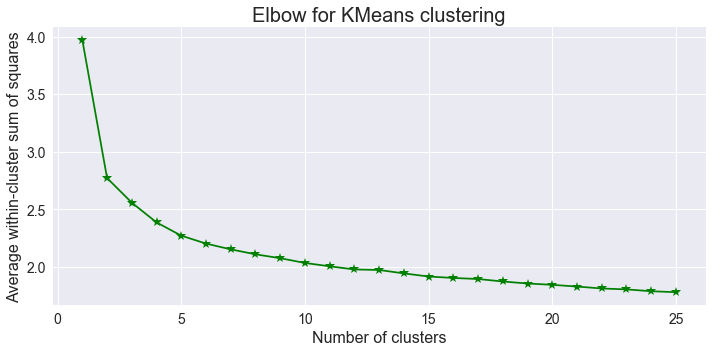

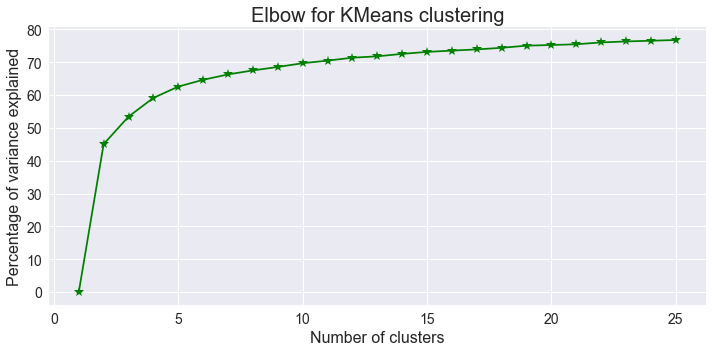

In [87]:
elbow(vals, range(1,26))

In [88]:

###############################################################################
# Fit K-means algorithm for selected number of clusters (again)


#creating a date range: 2000-2016
timeline = pd.date_range('2000', '2017', freq='A')

nc = 5

km = KMeans(n_clusters=nc, random_state=888)

km.fit(vals)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=888, tol=0.0001, verbose=0)

Cluster centers


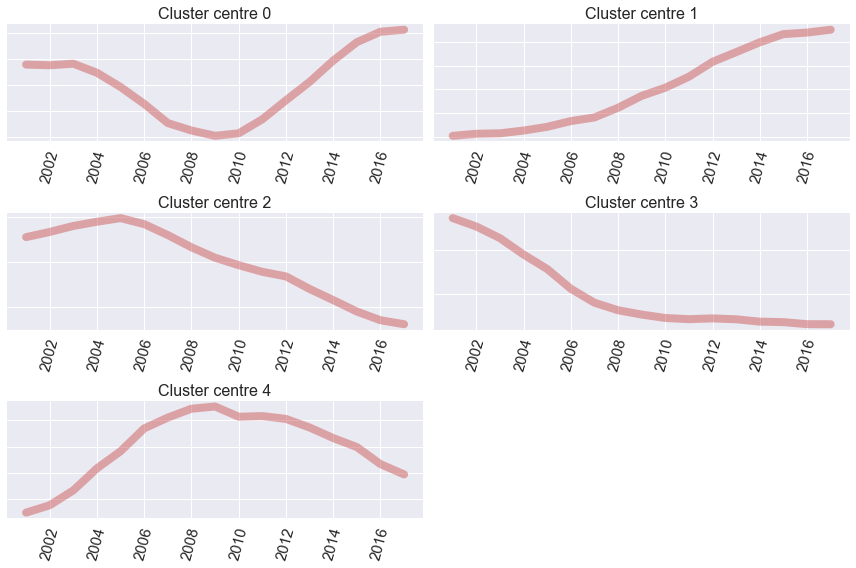

In [89]:
fig = pl.figure(figsize=(12, 8))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(3, 2, (i + 1))
    ax.plot(timeline, Xc, lw = 8, alpha = 0.5, c='IndianRed')
    
    pl.title("Cluster centre %d"%(i), fontsize = 16)
    
    
    pl.xticks(fontsize = 15, rotation=75)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    plt.tight_layout()
print("Cluster centers")

In [90]:
tsHispanicEnrolStandard['ClustLabel'] = km.labels_

In [91]:
tsHispanicEnrolStandard.columns

Index(['BNLONG', 'variable', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', 'popmean', 'stdev', 'ClustLabel'],
      dtype='object')

In [92]:
vals = tsHispanicEnrolStandard.drop(['variable', 'popmean', 'stdev'], axis = 1)

In [93]:
for j in range(nc):
    print("Schools in cluster", j)
    print(list(vals.BNLONG[km.labels_ == j]))
    print("\n")

Schools in cluster 0
['K001', 'K009', 'K028', 'K036', 'K040', 'K045', 'K053', 'K065', 'K088', 'K098', 'K130', 'K131', 'K140', 'K157', 'K163', 'K184', 'K197', 'K199', 'K206', 'K212', 'K231', 'K236', 'K241', 'K253', 'K254', 'K257', 'K278', 'K282', 'K284', 'K307', 'K312', 'K315', 'K327', 'K340', 'K361', 'K368', 'K373', 'K376', 'K380', 'K383', 'K398', 'K430', 'M002', 'M092', 'M123', 'M169', 'M199', 'M247', 'M411', 'M485', 'M515', 'M575', 'Q005', 'Q011', 'Q013', 'Q015', 'Q021', 'Q022', 'Q026', 'Q031', 'Q051', 'Q054', 'Q060', 'Q078', 'Q082', 'Q089', 'Q095', 'Q107', 'Q108', 'Q114', 'Q130', 'Q141', 'Q144', 'Q146', 'Q149', 'Q152', 'Q157', 'Q159', 'Q166', 'Q169', 'Q173', 'Q176', 'Q177', 'Q181', 'Q182', 'Q190', 'Q191', 'Q193', 'Q196', 'Q201', 'Q203', 'Q205', 'Q221', 'Q223', 'Q251', 'Q256', 'Q492', 'Q498', 'Q752', 'R004', 'R038', 'R046', 'R049', 'R055', 'X005', 'X011', 'X016', 'X036', 'X056', 'X057', 'X063', 'X086', 'X089', 'X094', 'X103', 'X108', 'X109', 'X114', 'X140', 'X153', 'X157', 'X170', 'X

In [278]:
tsHispanicEnrolStandard.to_csv('bySchoolHispEnrolClusters.csv', sep=',')

_____________________

## ELL's student enrolment - ONLY TWO YEARS OF DATA AVAILABLE. IGNORE 

_________

## Special Ed student enrolment 

In [247]:
tsSpEdEnrolment = f1[f1['variable']=='ENRNUMSPD']

In [248]:
tsSpEdEnrolment.head()

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
84,K001,ENRNUMSPD,50,51,26,25,18,22,34,25,...,68,83,94,96,113,101,109,116,140,168
230,K002,ENRNUMSPD,29,42,45,61,62,70,79,101,...,101,101,86,68,60,54,44,47,54,57
376,K003,ENRNUMSPD,21,25,17,17,18,18,19,18,...,22,22,21,28,26,34,39,37,29,32
522,K004,ENRNUMSPD,232,228,255,255,235,250,242,240,...,301,276,308,332,344,363,369,365,344,339
668,K005,ENRNUMSPD,21,9,50,51,47,47,38,39,...,39,40,34,28,40,47,37,29,22,31


In [249]:
# new dictionary colUpdate with all column names as strings
colUpdate = { 1996 : u'1996',       
              1997 : u'1997',       
              1998 : u'1998',       
              1999 : u'1999',
              2000 : u'2000',
              2001 : u'2001',     
              2002 : u'2002',
              2003 : u'2003',     
              2004 : u'2004',
              2005 : u'2005',
              2006 : u'2006',
              2007 : u'2007',     
              2008 : u'2008',
              2009 : u'2009',     
              2010 : u'2010',
              2011 : u'2011',
              2012 : u'2012',
              2013 : u'2013', 
              2014 : u'2014',
              2015 : u'2015',
              2016 : u'2016'}
tsSpEdEnrolment.rename(columns = colUpdate, inplace=True)
tsSpEdEnrolment.columns

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['BNLONG', 'variable', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [250]:
## Remove columns where all NaN
tsSpEdEnrolment.dropna(axis=1, how='all', inplace=True)

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [251]:
## Remove rows where any NaN
tsSpEdEnrolment.dropna(axis=0, how='any',inplace=True)

C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [252]:
tsSpEdEnrolment.shape

(900, 23)

In [253]:
tsSpEdEnrolment = tsSpEdEnrolment.loc[(tsSpEdEnrolment.loc[:,'1996':]!=0).any(axis=1)]

In [254]:
tsSpEdEnrolment.shape

(892, 23)

In [255]:
tsSpEdEnrolment.head()

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
84,K001,ENRNUMSPD,50,51,26,25,18,22,34,25,...,68,83,94,96,113,101,109,116,140,168
230,K002,ENRNUMSPD,29,42,45,61,62,70,79,101,...,101,101,86,68,60,54,44,47,54,57
376,K003,ENRNUMSPD,21,25,17,17,18,18,19,18,...,22,22,21,28,26,34,39,37,29,32
522,K004,ENRNUMSPD,232,228,255,255,235,250,242,240,...,301,276,308,332,344,363,369,365,344,339
668,K005,ENRNUMSPD,21,9,50,51,47,47,38,39,...,39,40,34,28,40,47,37,29,22,31


In [256]:
tsSpEdEnrolment['popmean'] = tsSpEdEnrolment['2016']
tsSpEdEnrolment['stdev'] = tsSpEdEnrolment['2016']
tsSpEdEnrolment.head()

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,popmean,stdev
84,K001,ENRNUMSPD,50,51,26,25,18,22,34,25,...,94,96,113,101,109,116,140,168,168,168
230,K002,ENRNUMSPD,29,42,45,61,62,70,79,101,...,86,68,60,54,44,47,54,57,57,57
376,K003,ENRNUMSPD,21,25,17,17,18,18,19,18,...,21,28,26,34,39,37,29,32,32,32
522,K004,ENRNUMSPD,232,228,255,255,235,250,242,240,...,308,332,344,363,369,365,344,339,339,339
668,K005,ENRNUMSPD,21,9,50,51,47,47,38,39,...,34,28,40,47,37,29,22,31,31,31


In [257]:
# append on mean and standard deviation to the datasets (BRUTE FORCE)

# Calculate the mean and standard deviation of the school totals over time
## in preparation for clustering
tsSpEdEnrolment['popmean'] = tsSpEdEnrolment['2016']
tsSpEdEnrolment['stdev'] = tsSpEdEnrolment['2016']

for i in tsSpEdEnrolment.index:
    tsSpEdEnrolment['popmean'].loc[i] = tsSpEdEnrolment.loc[i].drop(['BNLONG', 'variable','popmean','stdev']).mean() 
    tsSpEdEnrolment['stdev'].loc[i] = tsSpEdEnrolment.loc[i].drop(['BNLONG', 'variable','popmean','stdev']).std()

In [258]:
tsSpEdEnrolment.head()

,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,popmean,stdev
84,K001,ENRNUMSPD,50,51,26,25,18,22,34,25,...,94,96,113,101,109,116,140,168,71.1429,43.0096
230,K002,ENRNUMSPD,29,42,45,61,62,70,79,101,...,86,68,60,54,44,47,54,57,67.6667,21.6849
376,K003,ENRNUMSPD,21,25,17,17,18,18,19,18,...,21,28,26,34,39,37,29,32,24.1905,6.65296
522,K004,ENRNUMSPD,232,228,255,255,235,250,242,240,...,308,332,344,363,369,365,344,339,290.81,49.5809
668,K005,ENRNUMSPD,21,9,50,51,47,47,38,39,...,34,28,40,47,37,29,22,31,35.0476,11.8426


In [259]:
tsSpEdEnrolment.shape

(892, 25)

In [260]:
## Standardise the data

tsSpEdEnrolment.columns

Index(['BNLONG', 'variable', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', 'popmean', 'stdev'],
      dtype='object')

In [261]:
tsSpEdEnrolStandard = tsSpEdEnrolment.copy()
columnsStandard = ['1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016',]

In [262]:
for i in columnsStandard:
    tsSpEdEnrolStandard[i] = (tsSpEdEnrolment[i] - tsSpEdEnrolment.popmean) / tsSpEdEnrolment.stdev

In [263]:
tsSpEdEnrolStandard.columns

Index(['BNLONG', 'variable', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', 'popmean', 'stdev'],
      dtype='object')

In [264]:
vals = tsSpEdEnrolStandard.drop(['BNLONG', 'variable', 'popmean', 'stdev'], axis = 1)

In [265]:
# Check if as expected, means are zero and standard devations are 1

print("Expect means of each row to be = 0\n", vals.mean(1)[:10])
print("Expect stds of each row to be = 1\n", vals.std(1)[:10])

Expect means of each row to be = 0
 84      1.268826e-16
230    -2.220446e-16
376     1.057355e-16
522     2.273314e-16
668    -2.590520e-16
814    -4.229421e-17
960     2.114711e-17
1106    4.229421e-17
1252    2.749124e-16
1398   -2.749124e-16
dtype: float64
Expect stds of each row to be = 1
 84      1.0
230     1.0
376     1.0
522     1.0
668     1.0
814     1.0
960     1.0
1106    1.0
1252    1.0
1398    1.0
dtype: float64


In [266]:
## Remove rows where any NaN (some rows were all zeroes)
vals.dropna(axis=0, how='any',inplace=True)

In [267]:
vals.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
84,-0.491584,-0.468334,-1.0496,-1.07285,-1.2356,-1.1426,-0.863594,-1.07285,-0.817093,-0.514835,...,-0.0730733,0.275686,0.531442,0.577944,0.973204,0.694197,0.880201,1.04296,1.60097,2.25199
230,-1.78312,-1.18362,-1.04528,-0.307434,-0.261319,0.107602,0.522638,1.53717,1.16825,0.292062,...,1.53717,1.53717,0.845444,0.0153717,-0.353549,-0.63024,-1.09139,-0.953046,-0.63024,-0.491895
376,-0.479557,0.121679,-1.08079,-1.08079,-0.930484,-0.930484,-0.780175,-0.930484,-0.0286303,-0.479557,...,-0.329248,-0.329248,-0.479557,0.572606,0.271988,1.47446,2.226,1.92539,0.722915,1.17384
522,-1.18613,-1.26681,-0.722245,-0.722245,-1.12563,-0.82309,-0.984443,-1.02478,-0.964274,0.124856,...,0.205532,-0.298694,0.346716,0.830774,1.0728,1.45601,1.57703,1.49635,1.0728,0.971957
668,-1.18619,-2.19948,1.26259,1.34703,1.00927,1.00927,0.249301,0.333742,-2.11504,0.164861,...,0.333742,0.418183,-0.0884618,-0.595106,0.418183,1.00927,0.164861,-0.510666,-1.10175,-0.341784


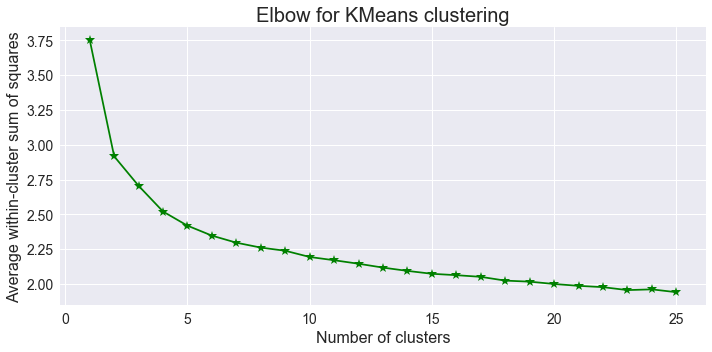

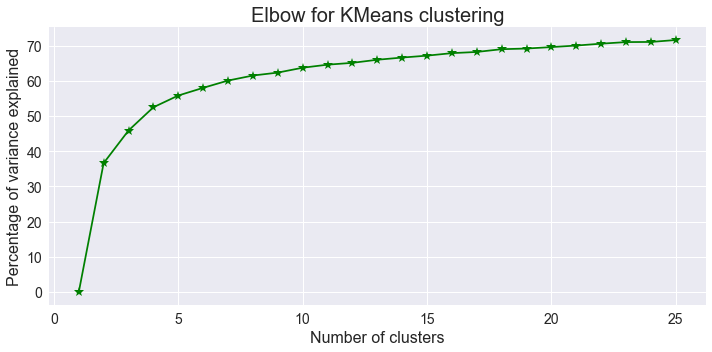

In [268]:
elbow(vals, range(1,26))

In [271]:

###############################################################################
# Fit K-means algorithm for selected number of clusters (again)


#creating a date range: 2000-2016
timeline = pd.date_range('1996', '2017', freq='A')

nc = 5

km = KMeans(n_clusters=nc, random_state=888)

km.fit(vals)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=888, tol=0.0001, verbose=0)

Cluster centers


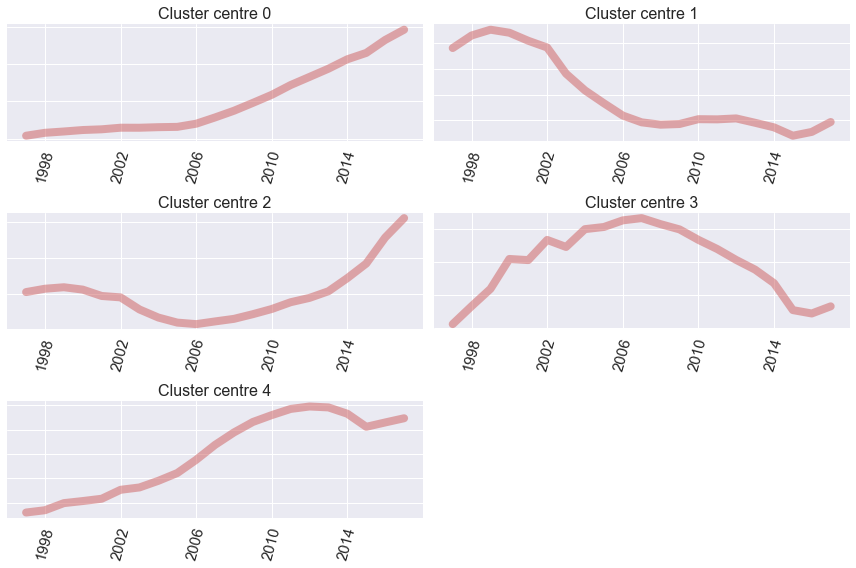

In [272]:
fig = pl.figure(figsize=(12, 8))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(3, 2, (i + 1))
    ax.plot(timeline, Xc, lw = 8, alpha = 0.5, c='IndianRed')
    
    pl.title("Cluster centre %d"%(i), fontsize = 16)
    
    
    pl.xticks(fontsize = 15, rotation=75)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    plt.tight_layout()
print("Cluster centers")

In [273]:
tsSpEdEnrolStandard['ClustLabel'] = km.labels_

In [274]:
tsSpEdEnrolStandard.columns

Index(['BNLONG', 'variable', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', 'popmean', 'stdev',
       'ClustLabel'],
      dtype='object')

In [275]:
vals = tsSpEdEnrolStandard.drop(['variable', 'popmean', 'stdev'], axis = 1)

In [276]:

for j in range(nc):
    print("Schools in cluster", j)
    print(list(vals.BNLONG[km.labels_ == j]))
    print("\n")

Schools in cluster 0
['K001', 'K003', 'K004', 'K006', 'K007', 'K008', 'K015', 'K017', 'K018', 'K021', 'K023', 'K028', 'K029', 'K031', 'K034', 'K039', 'K041', 'K048', 'K051', 'K058', 'K062', 'K065', 'K075', 'K086', 'K090', 'K093', 'K094', 'K095', 'K097', 'K099', 'K100', 'K102', 'K104', 'K106', 'K108', 'K109', 'K114', 'K115', 'K116', 'K119', 'K123', 'K124', 'K127', 'K128', 'K130', 'K131', 'K136', 'K139', 'K145', 'K146', 'K149', 'K151', 'K152', 'K156', 'K159', 'K160', 'K169', 'K170', 'K172', 'K177', 'K179', 'K180', 'K185', 'K193', 'K194', 'K198', 'K199', 'K200', 'K204', 'K207', 'K209', 'K212', 'K214', 'K215', 'K222', 'K224', 'K225', 'K229', 'K230', 'K234', 'K235', 'K240', 'K245', 'K247', 'K249', 'K250', 'K251', 'K253', 'K254', 'K259', 'K276', 'K278', 'K284', 'K285', 'K290', 'K307', 'K309', 'K409', 'K410', 'K425', 'K445', 'K490', 'K505', 'K525', 'K535', 'K545', 'K670', 'K685', 'M001', 'M002', 'M003', 'M004', 'M008', 'M020', 'M028', 'M034', 'M040', 'M042', 'M046', 'M051', 'M057', 'M059', 'M

In [277]:
tsSpEdEnrolStandard.to_csv('bySchoolSpecialEdClusters.csv', sep=',')

_______________________

In [322]:
def standardizeTimeSeries(variableName):
    '''
    This function standardizes time series using the melt file
    '''
    
    #drop all variables other than 'variable name'
    dfStandardize = f1[f1['variable']== variableName]
    
    # new dictionary colUpdate with all column names as strings
    colUpdate = { 1996 : u'1996',       
                  1997 : u'1997',       
                  1998 : u'1998',       
                  1999 : u'1999',
                  2000 : u'2000',
                  2001 : u'2001',     
                  2002 : u'2002',
                  2003 : u'2003',     
                  2004 : u'2004',
                  2005 : u'2005',
                  2006 : u'2006',
                  2007 : u'2007',     
                  2008 : u'2008',
                  2009 : u'2009',     
                  2010 : u'2010',
                  2011 : u'2011',
                  2012 : u'2012',
                  2013 : u'2013', 
                  2014 : u'2014',
                  2015 : u'2015',
                  2016 : u'2016'}
    dfStandardize.rename(columns = colUpdate, inplace=True)
    
    ## Remove columns where all NaN
    dfStandardize.dropna(axis=1, how='all', inplace=True)
    
    ## Remove rows where any NaN
    dfStandardize.dropna(axis=0, how='any',inplace=True)
    
    ## Remove rows where all time series are zero 
    dfStandardize = dfStandardize.loc[(dfStandardize.iloc[:,2:]!=0).any(axis=1)]
    
    ## Assign values to data frame fr popmean and stdev
    meanSeries = dfStandardize.iloc[:,2:].T.mean()
    stdDevSeries = dfStandardize.iloc[:,2:].T.std()
    dfStandardize['popmean'] = meanSeries
    dfStandardize['stdev'] = stdDevSeries
    
    ## Obtain year columns to standardise the data
    columnsStandard = dfStandardize.columns[2:-2]
    
    ## Standardise the data
    for i in columnsStandard:
        dfStandardize[i] = (dfStandardize[i] - dfStandardize.popmean) / dfStandardize.stdev
        
    return dfStandardize
    

In [323]:
standardizeTimeSeries('ENRNUMSPD')

C:\Users\Jonathan\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,BNLONG,variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,popmean,stdev
84,K001,ENRNUMSPD,-0.491584,-0.468334,-1.0496,-1.07285,-1.2356,-1.1426,-0.863594,-1.07285,...,0.531442,0.577944,0.973204,0.694197,0.880201,1.04296,1.60097,2.25199,71.142857,43.009633
230,K002,ENRNUMSPD,-1.78312,-1.18362,-1.04528,-0.307434,-0.261319,0.107602,0.522638,1.53717,...,0.845444,0.0153717,-0.353549,-0.63024,-1.09139,-0.953046,-0.63024,-0.491895,67.666667,21.684864
376,K003,ENRNUMSPD,-0.479557,0.121679,-1.08079,-1.08079,-0.930484,-0.930484,-0.780175,-0.930484,...,-0.479557,0.572606,0.271988,1.47446,2.226,1.92539,0.722915,1.17384,24.190476,6.652962
522,K004,ENRNUMSPD,-1.18613,-1.26681,-0.722245,-0.722245,-1.12563,-0.82309,-0.984443,-1.02478,...,0.346716,0.830774,1.0728,1.45601,1.57703,1.49635,1.0728,0.971957,290.809524,49.580862
668,K005,ENRNUMSPD,-1.18619,-2.19948,1.26259,1.34703,1.00927,1.00927,0.249301,0.333742,...,-0.0884618,-0.595106,0.418183,1.00927,0.164861,-0.510666,-1.10175,-0.341784,35.047619,11.842619
814,K006,ENRNUMSPD,-1.04175,-1.04175,-0.927408,-0.736844,-0.622506,-0.660619,-0.698732,-0.698732,...,0.0635211,0.0635211,0.292197,0.863887,0.558985,1.54991,1.93104,2.54084,60.333333,26.238013
960,K007,ENRNUMSPD,-0.886723,-0.886723,-0.886723,-0.886723,-0.886723,-0.886723,-0.676314,-0.702615,...,0.165321,0.586139,0.533536,0.717644,1.13846,1.42777,2.059,2.1116,33.714286,38.021235
1106,K008,ENRNUMSPD,-1.1326,-1.1326,-1.1326,-1.1326,-1.1326,-0.279494,-0.347743,-0.48424,...,0.539489,0.402992,0.641862,0.539489,1.08548,1.18785,1.83621,2.21158,33.190476,29.304640
1252,K009,ENRNUMSPD,-1.13039,-0.653718,0.204287,0.204287,-0.272383,0.204287,-0.272383,0.108953,...,-0.844386,0.490289,0.871624,1.06229,0.680956,0.680956,2.30163,1.53896,59.857143,10.489450
1398,K010,ENRNUMSPD,-1.92511,-1.83087,-1.02987,-0.464449,-0.700039,-0.511567,-0.605803,-0.228859,...,-0.0875049,-0.0875049,-0.558685,-0.0875049,0.666383,0.901974,1.37315,2.03281,82.857143,21.223303
